In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_2023 = pd.read_csv("../data/data_2023_clean.csv")
data_2024 = pd.read_csv("../data/data_2024_clean.csv")

## Analysis on 2023 dataset

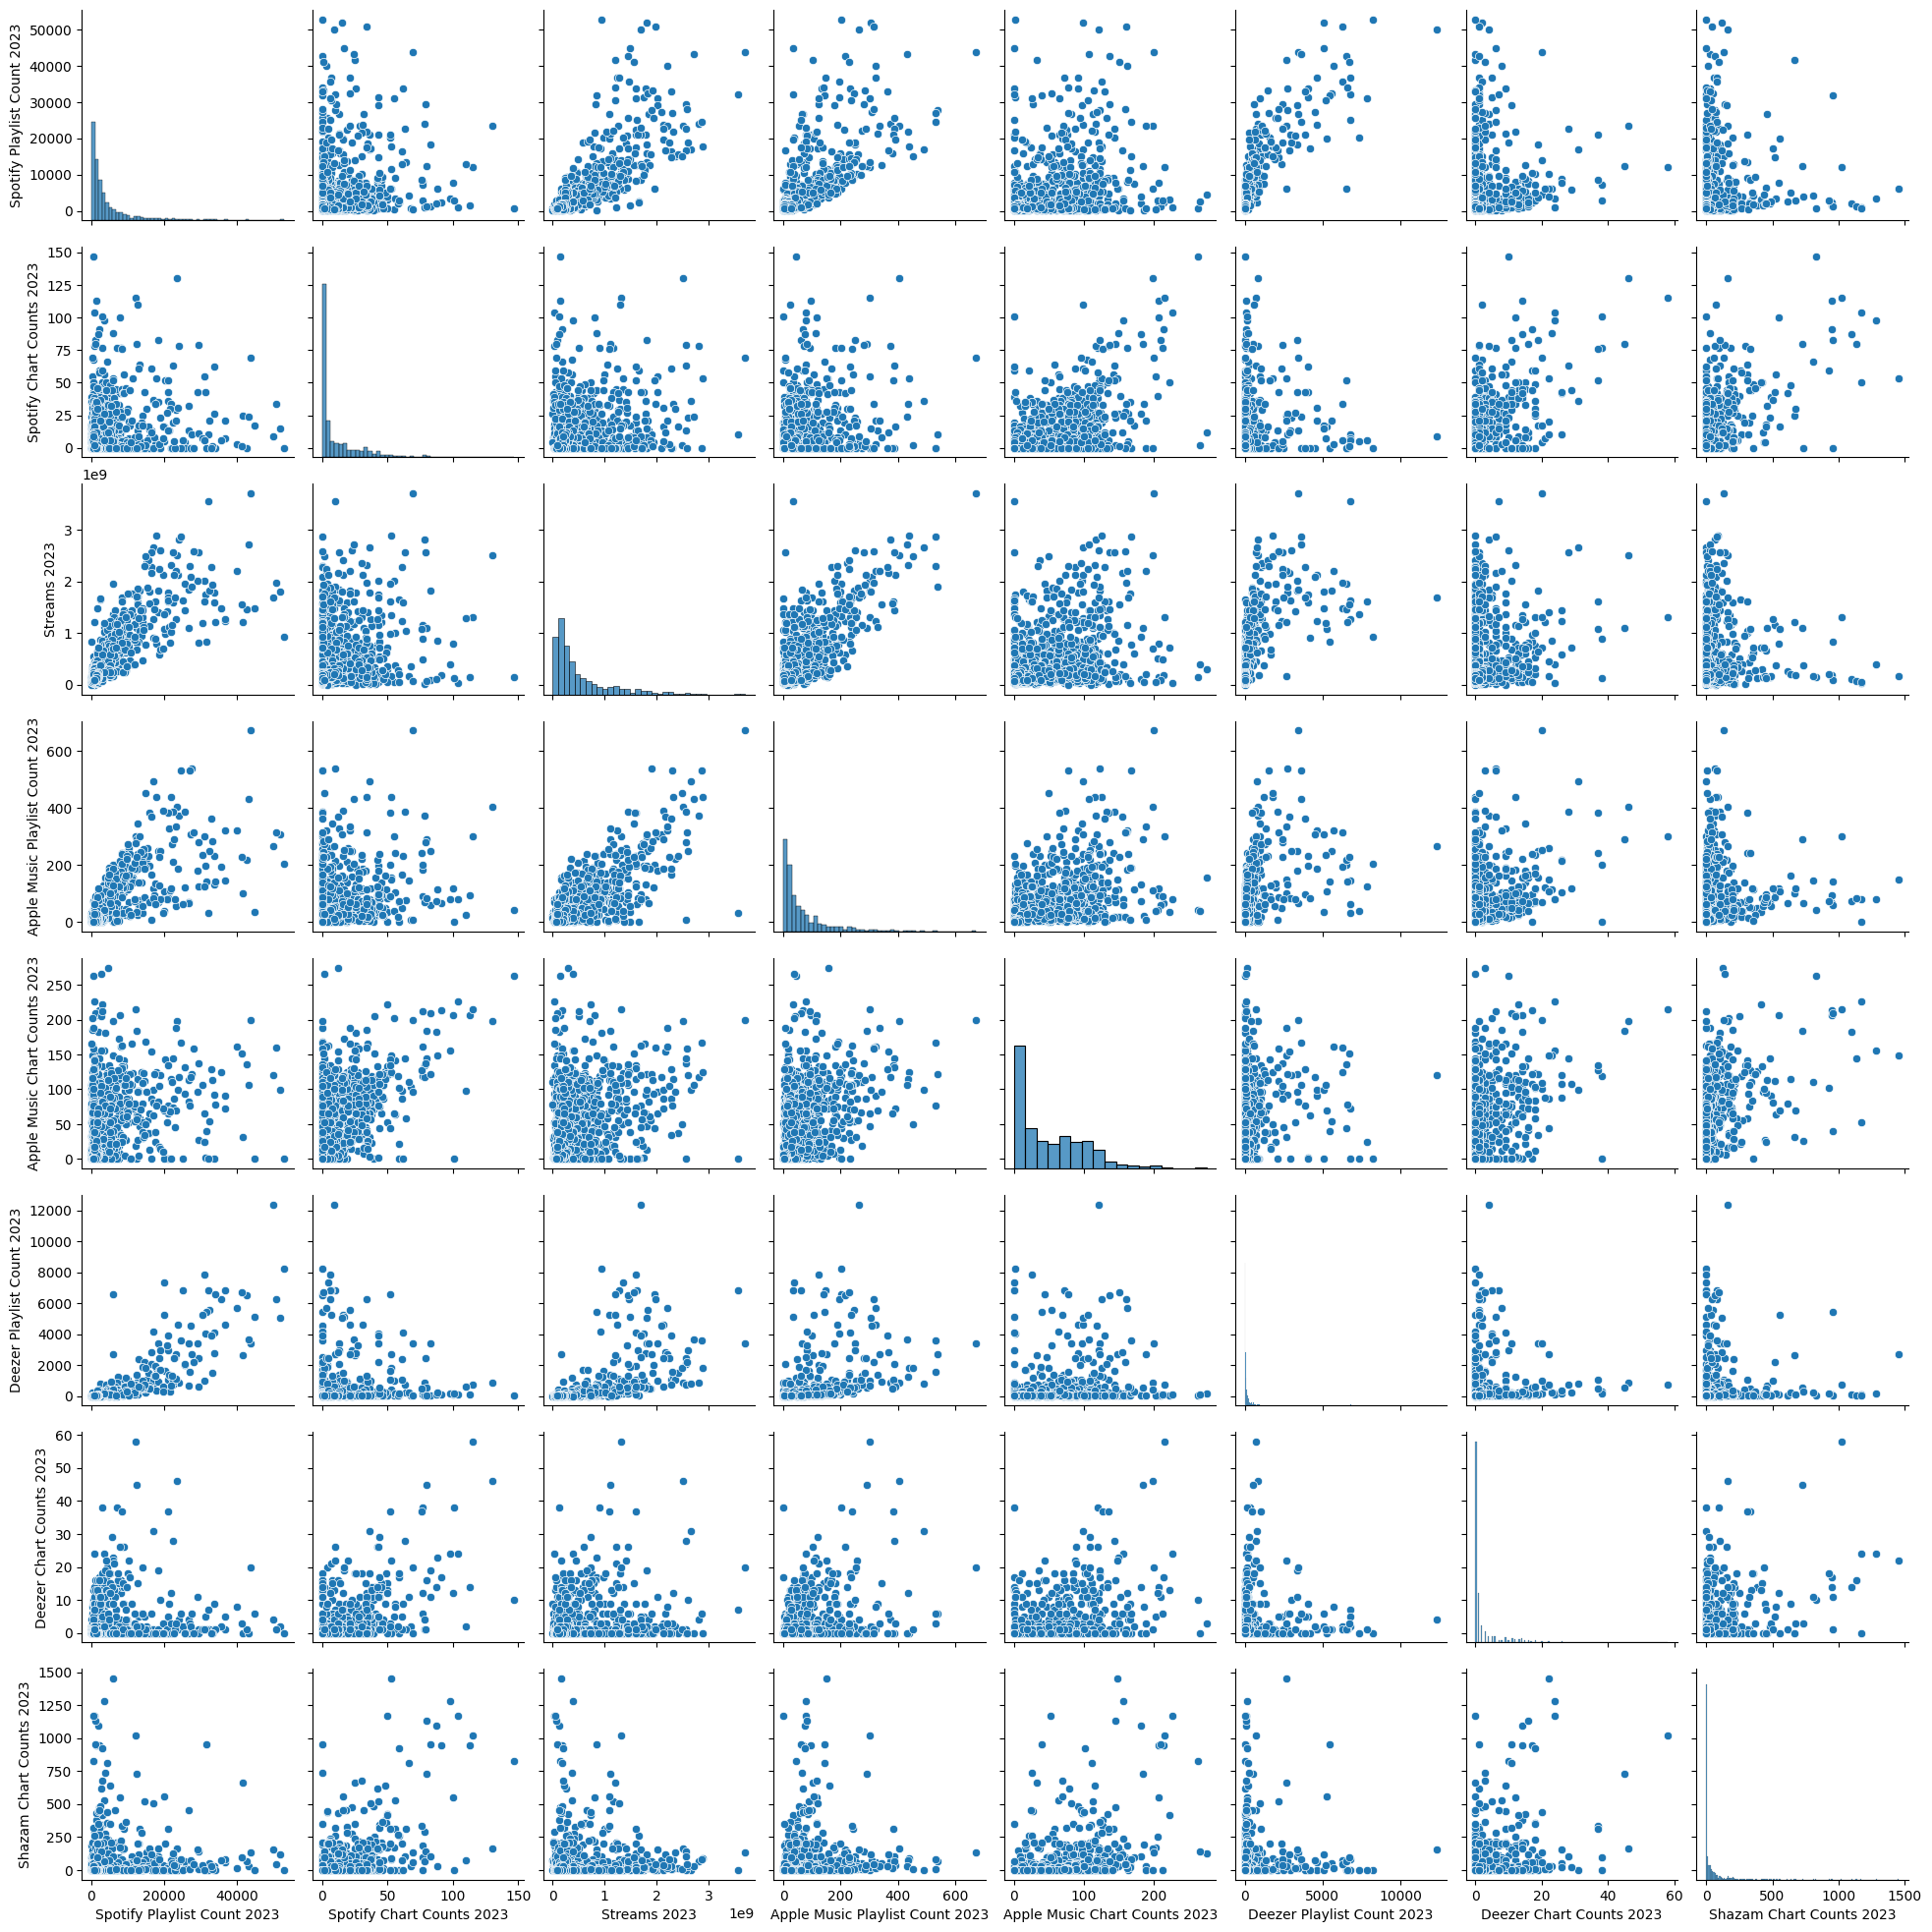

In [5]:
# Relationship between types of counts

sns.pairplot(data_2023[["Spotify Playlist Count 2023", "Spotify Chart Counts 2023", "Streams 2023",
                           "Apple Music Playlist Count 2023", "Apple Music Chart Counts 2023", "Deezer Playlist Count 2023",
                           "Deezer Chart Counts 2023", "Shazam Chart Counts 2023"]])

Most of the plots have the strong positive correlation, so we could say that the data about appearances in playlists and charts in different music platforms are strong correlated.

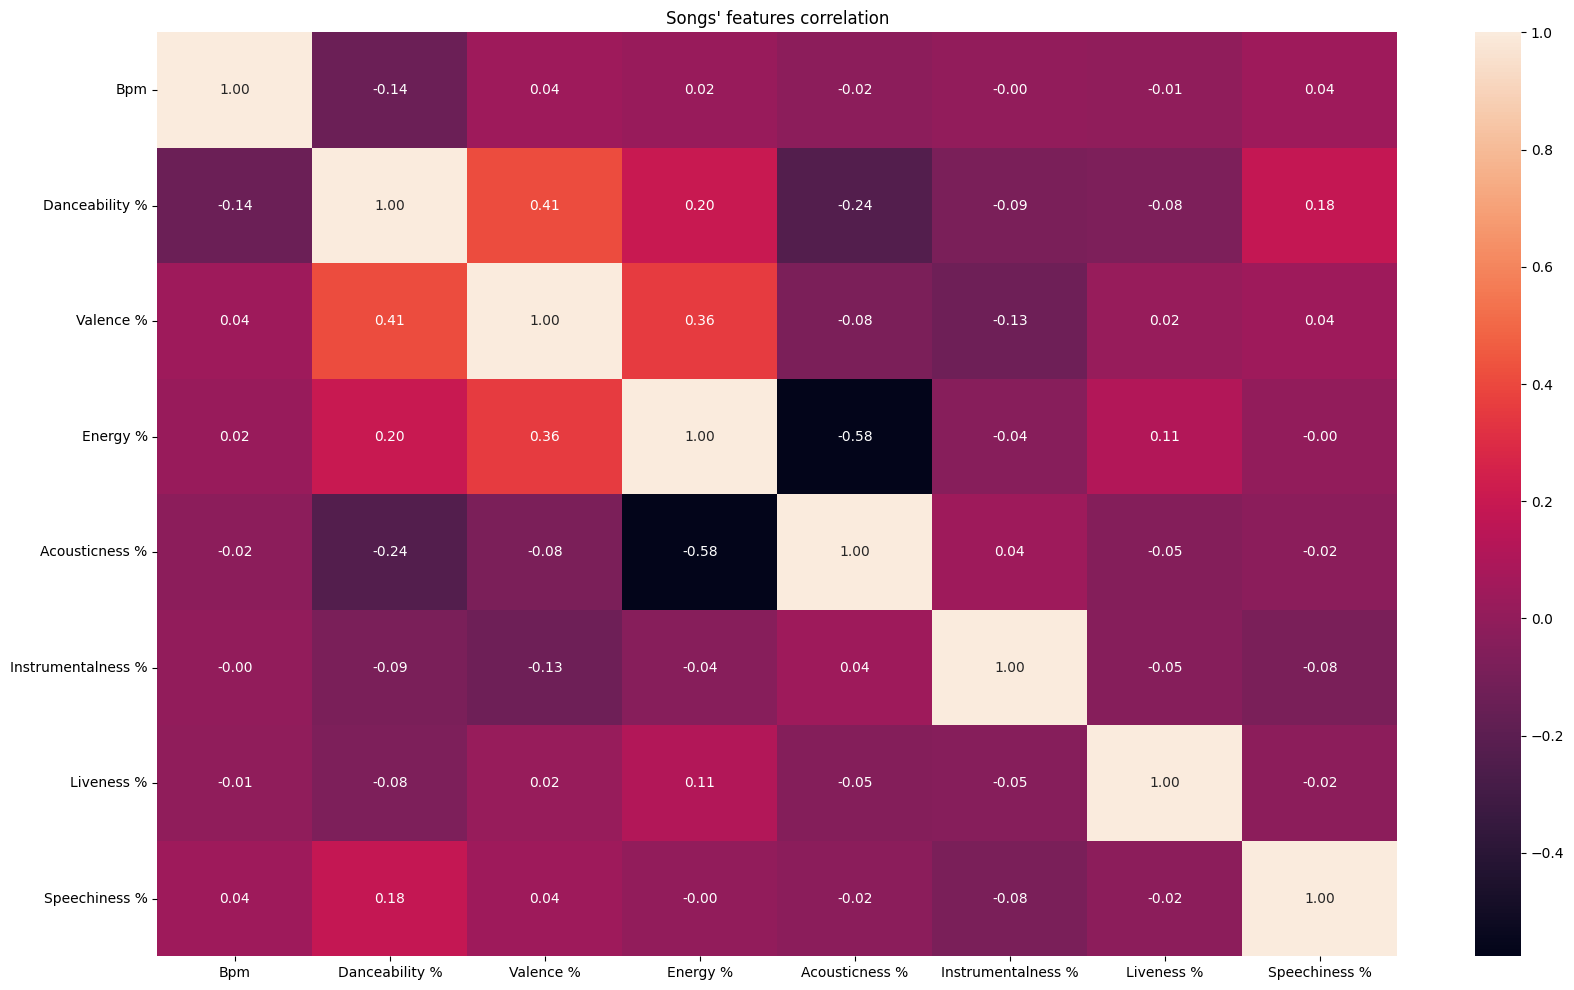

In [6]:
# Heatmap to see the correlation between features
numerical_features = data_2023[['Bpm', 'Danceability %',
       'Valence %', 'Energy %', 'Acousticness %', 'Instrumentalness %',
       'Liveness %', 'Speechiness %']].corr()

plt.figure(figsize=(20,12))
sns.heatmap(numerical_features, annot=True, fmt='.2f')

plt.title("Songs' features correlation")
plt.show()

Text(0.5, 1.02, 'Appearance in Playlist Counts Across Platforms (2023)')

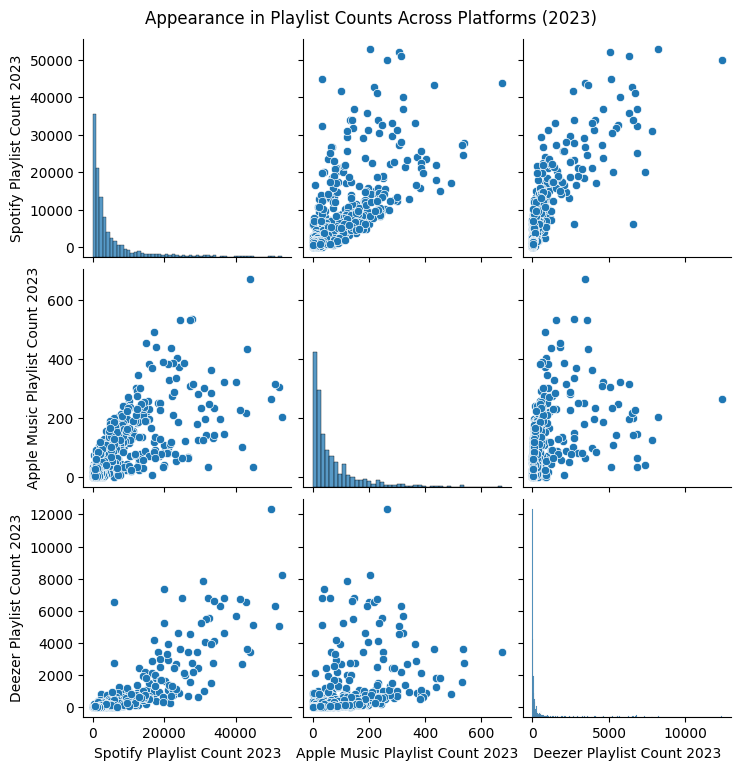

In [7]:
# Scatter plot among appearances in playlists

pairplot = sns.pairplot(data_2023[["Spotify Playlist Count 2023", 
                                   "Apple Music Playlist Count 2023", 
                                   "Deezer Playlist Count 2023"]])

pairplot.fig.suptitle("Appearance in Playlist Counts Across Platforms (2023)", 
                      y=1.02)

Text(0.5, 1.02, 'Appearance in Chart Counts Across Platforms (2023)')

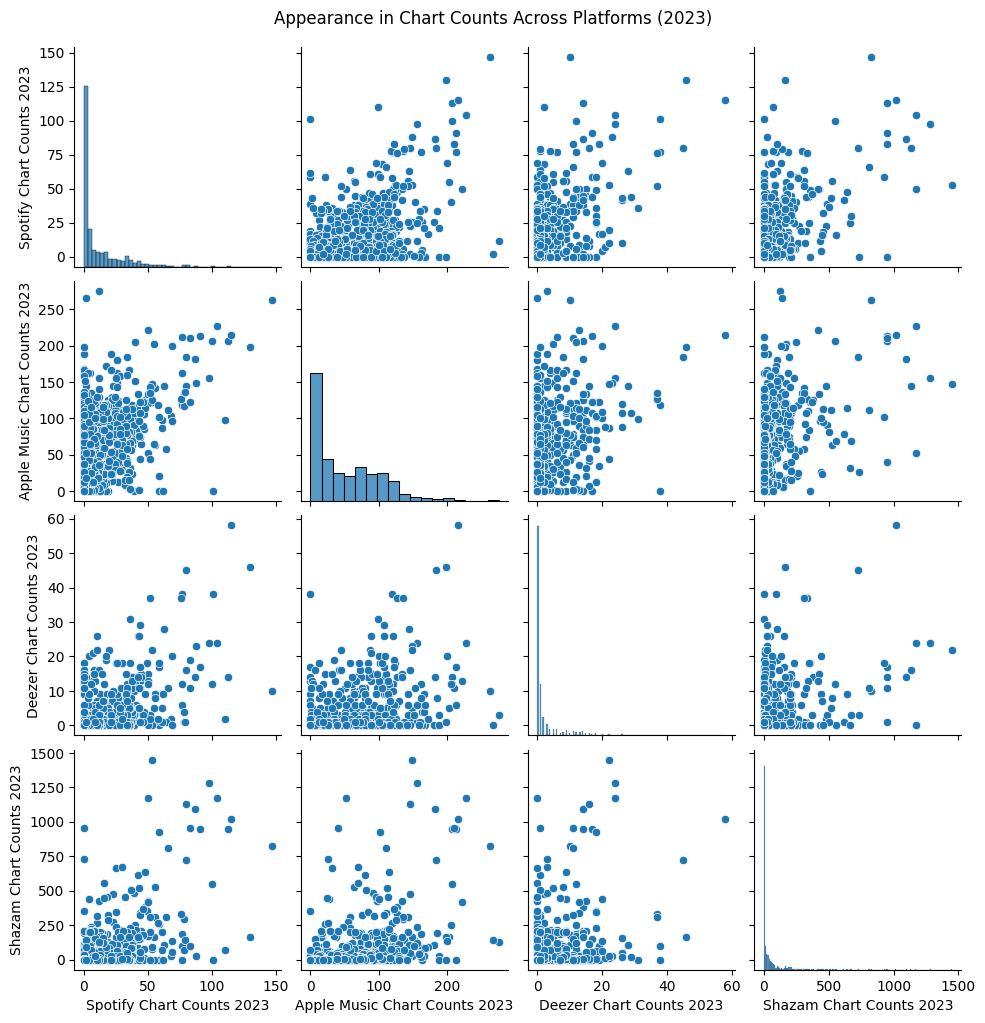

In [8]:
# Scatter plot among appearances in playlists

pairplot = sns.pairplot(data_2023[["Spotify Chart Counts 2023", "Apple Music Chart Counts 2023",
                           "Deezer Chart Counts 2023", "Shazam Chart Counts 2023"
                           ]])

pairplot.fig.suptitle("Appearance in Chart Counts Across Platforms (2023)", 
                      y=1.02)

They also have the positive correlation, but the variance are greater than what we see among playlists. Therefore, there is an potential conclusion about this: Since playlists and different music platforms have quite the same result about the appearances of tracks, the preference of users in different platforms don't have much difference. However, appearances of tracks in charts are different, which could be explained by the different assessment criteria in different music platforms.

### Overview about the distribution of features among selected tracks

In [9]:
import seaborn as sns

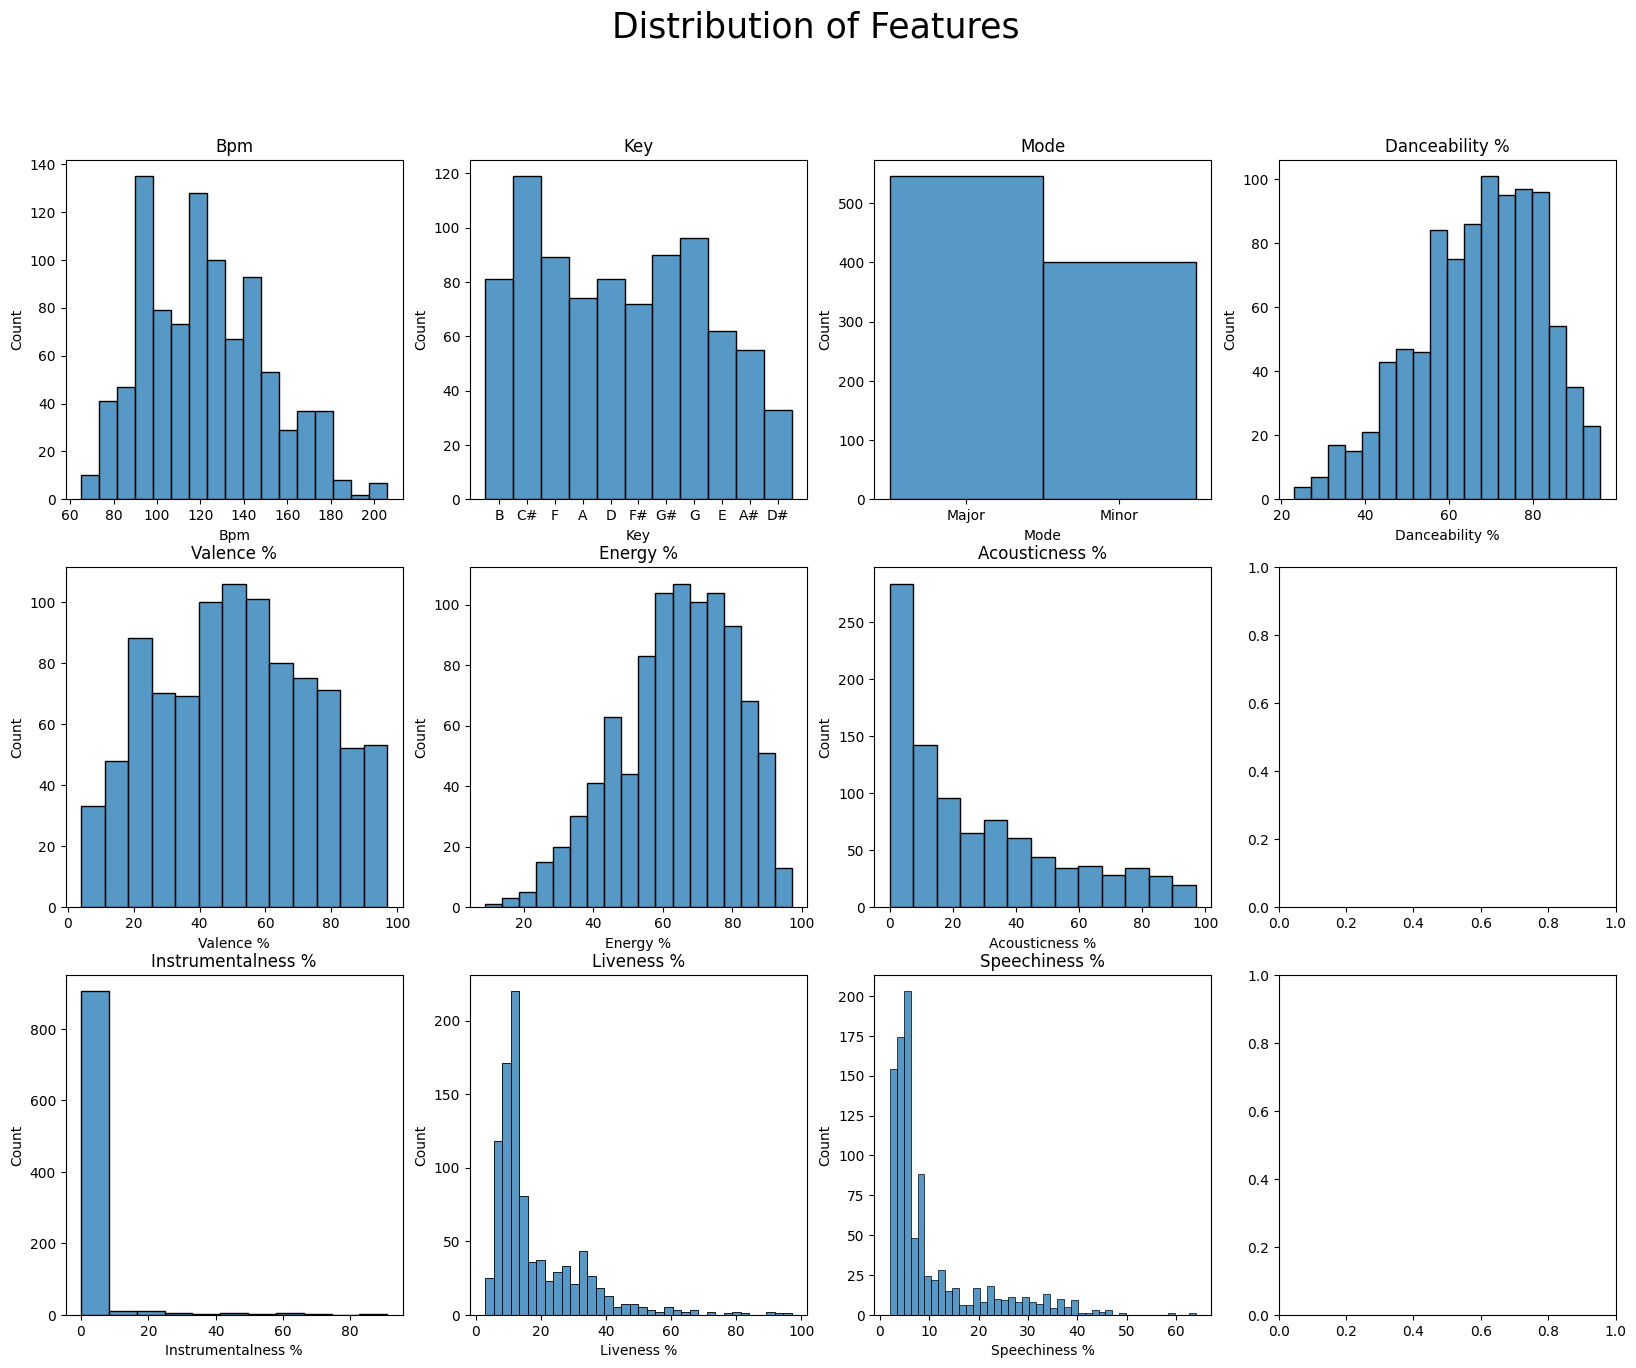

In [10]:
# Make histogram to see the distribution of features
def feature_distribution(df):

    fig, axes = plt.subplots(3, 4, figsize=(20,15))
    indexes = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [2,0], [2,1], [2,2]]
    i = 0

    list_of_features = ['Bpm', 'Key', 'Mode', 'Danceability %',
        'Valence %', 'Energy %', 'Acousticness %', 'Instrumentalness %',
        'Liveness %', 'Speechiness %']
    for feature in list_of_features:
        index = indexes[i]
        sns.histplot(data=df, x=feature, ax=axes[index[0], index[1]])
        axes[index[0], index[1]].set_title(feature)
        i += 1

    fig.suptitle("Distribution of Features", fontsize=25)
    plt.show()

feature_distribution(data_2023)

What we can see:

+ Bpm (Beats per minute, a measure of song tempo): We can see that in 2023, people prefer songs that don't have too many beats (from 90-130). 

+ Key: No significant difference between keys, but the C# has the most appearance

+ Mode: No significant difference between major and minor

+ Danceability (Percentage indicating how suitable the song is for dancing): People prefer songs that have the danceability between 60-80%

+ Variance (Positivity of the song's musical content): People prefer songs with neutral vibes

+ Energy (Perceived energy level of the song): People prefer songs with high energy

+ Acousticness (Amount of acoustic sound in the song): Seems that acoustic music is not the trend in 2023

+ Instrumentalness (Amount of instrumental content in the song): Most of the songs have only 10% instrucmentalness

+ Liveness (Presence of live performance elements): Most songs only have 10-20% presence of live performance elements

+ Speechiness (Amount of spoken words): Again, majority of the songs in the list have so little amount of spoken words.

### Analysis on Chart vs Playlist Count

#### Spotify

In [11]:
spotify_2023 = data_2023[["Track", "Artist", "Release Date", "Spotify Playlist Count 2023", "Spotify Chart Counts 2023",
                          'Bpm', 'Key', 'Mode', 'Danceability %',
       'Valence %', 'Energy %', 'Acousticness %', 'Instrumentalness %',
       'Liveness %', 'Speechiness %']]
spotify_2023

,Track,Artist,Release Date,Spotify Playlist Count 2023,Spotify Chart Counts 2023,Bpm,Key,Mode,Danceability %,Valence %,Energy %,Acousticness %,Instrumentalness %,Liveness %,Speechiness %
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",7/14/2023,553,147,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
1,LALA,Myke Towers,3/23/2023,1474,48,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
2,vampire,Olivia Rodrigo,6/30/2023,1397,113,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
3,Cruel Summer,Taylor Swift,8/23/2019,7858,100,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
4,WHERE SHE GOES,Bad Bunny,5/18/2023,3133,50,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,My Mind & Me,Selena Gomez,11/3/2022,953,0,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
942,Bigger Than The Whole Sky,Taylor Swift,10/21/2022,1180,0,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
943,A Veces (feat. Feid),"Feid, Paulo Londra",11/3/2022,573,0,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0
944,En La De Ella,"Feid, Sech, Jhayco",10/20/2022,1320,0,97.0,C#,Major,82.0,67.0,77.0,8.0,0.0,12.0,5.0


In [12]:
# top 20 Spotify appearance in chart

spotify_2023.sort_values(by="Spotify Chart Counts 2023", ascending=False).head(20)

,Track,Artist,Release Date,Spotify Playlist Count 2023,Spotify Chart Counts 2023,Bpm,Key,Mode,Danceability %,Valence %,Energy %,Acousticness %,Instrumentalness %,Liveness %,Speechiness %
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",7/14/2023,553,147,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
14,As It Was,Harry Styles,3/31/2022,23575,130,174.0,F#,Minor,52.0,66.0,73.0,34.0,0.0,31.0,6.0
12,Flowers,Miley Cyrus,1/12/2023,12211,115,118.0,NaN,Major,71.0,65.0,68.0,6.0,0.0,3.0,7.0
2,vampire,Olivia Rodrigo,6/30/2023,1397,113,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
22,I Wanna Be Yours,Arctic Monkeys,1/1/2013,12859,110,135.0,NaN,Minor,48.0,44.0,42.0,12.0,2.0,11.0,3.0
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,7/13/2023,873,104,78.0,NaN,Major,44.0,14.0,9.0,96.0,0.0,10.0,3.0
29,Dance The Night (From Barbie The Album),Dua Lipa,5/25/2023,2988,101,110.0,B,Minor,67.0,78.0,85.0,2.0,0.0,33.0,5.0
3,Cruel Summer,Taylor Swift,8/23/2019,7858,100,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
13,Daylight,David Kushner,4/14/2023,3528,98,130.0,D,Minor,51.0,32.0,43.0,83.0,0.0,9.0,3.0
5,Sprinter,"Dave, Central Cee",6/1/2023,2186,91,141.0,C#,Major,92.0,66.0,58.0,19.0,0.0,8.0,24.0


In [13]:
# top 20 songs appear most on playlists
spotify_2023.sort_values(by="Spotify Playlist Count 2023", ascending=False).head(20)

,Track,Artist,Release Date,Spotify Playlist Count 2023,Spotify Chart Counts 2023,Bpm,Key,Mode,Danceability %,Valence %,Energy %,Acousticness %,Instrumentalness %,Liveness %,Speechiness %
751,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",1/1/2013,52898,0,116.0,F#,Minor,79.0,87.0,81.0,4.0,0.0,10.0,4.0
624,Mr. Brightside,The Killers,9/23/2003,51979,15,148.0,C#,Major,35.0,24.0,93.0,0.0,0.0,10.0,8.0
714,Wake Me Up - Radio Edit,Avicii,1/1/2013,50887,34,124.0,D,Major,53.0,66.0,78.0,0.0,0.0,16.0,5.0
618,Smells Like Teen Spirit - Remastered 2021,Nirvana,9/10/1991,49991,9,117.0,C#,Major,52.0,73.0,91.0,0.0,0.0,11.0,7.0
197,Take On Me,a-ha,10/19/1984,44927,17,84.0,F#,Minor,57.0,86.0,90.0,2.0,0.0,9.0,5.0
55,Blinding Lights,The Weeknd,11/29/2019,43899,69,171.0,C#,Major,50.0,38.0,80.0,0.0,0.0,9.0,7.0
162,One Dance,"Drake, WizKid, Kyla",4/4/2016,43257,24,104.0,C#,Major,77.0,36.0,63.0,1.0,0.0,36.0,5.0
721,Somebody That I Used To Know,"Gotye, Kimbra",1/1/2011,42798,0,129.0,NaN,Major,86.0,75.0,52.0,54.0,0.0,10.0,4.0
114,Everybody Wants To Rule The World,Tears For Fears,2/17/1985,41751,25,112.0,G,Major,64.0,54.0,81.0,36.0,0.0,11.0,6.0
864,Sweet Child O' Mine,Guns N' Roses,1/1/1987,41231,1,125.0,F#,Major,45.0,67.0,90.0,9.0,11.0,10.0,5.0


#### Apple Music

In [14]:
apple_2023 = data_2023[["Track", "Artist", "Release Date", "Apple Music Playlist Count 2023", "Apple Music Chart Counts 2023",
                          'Bpm', 'Key', 'Mode', 'Danceability %',
       'Valence %', 'Energy %', 'Acousticness %', 'Instrumentalness %',
       'Liveness %', 'Speechiness %']]
apple_2023

,Track,Artist,Release Date,Apple Music Playlist Count 2023,Apple Music Chart Counts 2023,Bpm,Key,Mode,Danceability %,Valence %,Energy %,Acousticness %,Instrumentalness %,Liveness %,Speechiness %
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",7/14/2023,43,263,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
1,LALA,Myke Towers,3/23/2023,48,126,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
2,vampire,Olivia Rodrigo,6/30/2023,94,207,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
3,Cruel Summer,Taylor Swift,8/23/2019,116,207,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
4,WHERE SHE GOES,Bad Bunny,5/18/2023,84,133,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,My Mind & Me,Selena Gomez,11/3/2022,61,13,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
942,Bigger Than The Whole Sky,Taylor Swift,10/21/2022,4,0,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
943,A Veces (feat. Feid),"Feid, Paulo Londra",11/3/2022,2,0,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0
944,En La De Ella,"Feid, Sech, Jhayco",10/20/2022,29,26,97.0,C#,Major,82.0,67.0,77.0,8.0,0.0,12.0,5.0


In [15]:
# top 20 Apple Music appearance in chart

apple_2023.sort_values(by="Apple Music Chart Counts 2023", ascending=False).head(20)

,Track,Artist,Release Date,Apple Music Playlist Count 2023,Apple Music Chart Counts 2023,Bpm,Key,Mode,Danceability %,Valence %,Energy %,Acousticness %,Instrumentalness %,Liveness %,Speechiness %
865,Last Last,Burna Boy,5/12/2022,156,275,88.0,D#,Minor,80.0,55.0,56.0,13.0,0.0,8.0,9.0
881,Mary On A Cross,Ghost,9/13/2019,38,266,130.0,B,Major,47.0,56.0,90.0,0.0,0.0,10.0,4.0
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",7/14/2023,43,263,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,7/13/2023,80,227,78.0,NaN,Major,44.0,14.0,9.0,96.0,0.0,10.0,3.0
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",3/16/2023,34,222,148.0,F,Minor,67.0,83.0,76.0,48.0,0.0,8.0,3.0
12,Flowers,Miley Cyrus,1/12/2023,300,215,118.0,NaN,Major,71.0,65.0,68.0,6.0,0.0,3.0,7.0
5,Sprinter,"Dave, Central Cee",6/1/2023,67,213,141.0,C#,Major,92.0,66.0,58.0,19.0,0.0,8.0,24.0
16,Cupid - Twin Ver.,Fifty Fifty,2/24/2023,91,212,120.0,B,Minor,78.0,76.0,59.0,43.0,0.0,34.0,3.0
8,fukumean,Gunna,5/15/2023,60,210,130.0,C#,Minor,85.0,22.0,62.0,12.0,0.0,28.0,9.0
2,vampire,Olivia Rodrigo,6/30/2023,94,207,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0


In [16]:
# top 20 Apple Music appearance in playlist

apple_2023.sort_values(by="Apple Music Playlist Count 2023", ascending=False).head(20)

,Track,Artist,Release Date,Apple Music Playlist Count 2023,Apple Music Chart Counts 2023,Bpm,Key,Mode,Danceability %,Valence %,Energy %,Acousticness %,Instrumentalness %,Liveness %,Speechiness %
55,Blinding Lights,The Weeknd,11/29/2019,672,199,171.0,C#,Major,50.0,38.0,80.0,0.0,0.0,9.0,7.0
399,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",6/2/2017,537,122,124.0,A,Minor,79.0,59.0,86.0,4.0,0.0,8.0,11.0
614,Dance Monkey,Tones and I,5/10/2019,533,167,98.0,F#,Minor,82.0,54.0,59.0,69.0,0.0,18.0,10.0
403,Don't Start Now,Dua Lipa,10/31/2019,532,77,124.0,B,Minor,79.0,68.0,79.0,1.0,0.0,10.0,8.0
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",7/9/2021,492,99,170.0,C#,Major,59.0,48.0,76.0,4.0,0.0,10.0,5.0
687,Se��o,"Shawn Mendes, Camila Cabello",6/19/2019,453,50,117.0,A,Minor,76.0,77.0,52.0,4.0,0.0,8.0,3.0
86,Someone You Loved,Lewis Capaldi,11/8/2018,440,125,110.0,C#,Major,50.0,45.0,41.0,75.0,0.0,11.0,3.0
127,Watermelon Sugar,Harry Styles,11/17/2019,437,115,95.0,NaN,Major,55.0,56.0,82.0,12.0,0.0,34.0,5.0
162,One Dance,"Drake, WizKid, Kyla",4/4/2016,433,107,104.0,C#,Major,77.0,36.0,63.0,1.0,0.0,36.0,5.0
14,As It Was,Harry Styles,3/31/2022,403,198,174.0,F#,Minor,52.0,66.0,73.0,34.0,0.0,31.0,6.0


#### Deezer 

In [17]:
deezer_2023 = data_2023[["Track", "Artist", "Release Date", "Deezer Playlist Count 2023", "Deezer Chart Counts 2023",
                          'Bpm', 'Key', 'Mode', 'Danceability %',
       'Valence %', 'Energy %', 'Acousticness %', 'Instrumentalness %',
       'Liveness %', 'Speechiness %']]
deezer_2023

,Track,Artist,Release Date,Deezer Playlist Count 2023,Deezer Chart Counts 2023,Bpm,Key,Mode,Danceability %,Valence %,Energy %,Acousticness %,Instrumentalness %,Liveness %,Speechiness %
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",7/14/2023,45,10,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
1,LALA,Myke Towers,3/23/2023,58,14,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
2,vampire,Olivia Rodrigo,6/30/2023,91,14,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
3,Cruel Summer,Taylor Swift,8/23/2019,125,12,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
4,WHERE SHE GOES,Bad Bunny,5/18/2023,87,15,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,My Mind & Me,Selena Gomez,11/3/2022,37,1,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
942,Bigger Than The Whole Sky,Taylor Swift,10/21/2022,8,0,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
943,A Veces (feat. Feid),"Feid, Paulo Londra",11/3/2022,7,0,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0
944,En La De Ella,"Feid, Sech, Jhayco",10/20/2022,17,0,97.0,C#,Major,82.0,67.0,77.0,8.0,0.0,12.0,5.0


In [18]:
# top 20 Deezer appearance in playlist

deezer_2023.sort_values(by="Deezer Playlist Count 2023", ascending=False).head(20)

,Track,Artist,Release Date,Deezer Playlist Count 2023,Deezer Chart Counts 2023,Bpm,Key,Mode,Danceability %,Valence %,Energy %,Acousticness %,Instrumentalness %,Liveness %,Speechiness %
618,Smells Like Teen Spirit - Remastered 2021,Nirvana,9/10/1991,12367,4,117.0,C#,Major,52.0,73.0,91.0,0.0,0.0,11.0,7.0
751,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",1/1/2013,8215,0,116.0,F#,Minor,79.0,87.0,81.0,4.0,0.0,10.0,4.0
903,The Scientist,Coldplay,8/5/2002,7827,1,146.0,F,Major,56.0,21.0,44.0,73.0,0.0,11.0,2.0
329,Numb,Linkin Park,3/24/2003,7341,0,110.0,A,Major,50.0,24.0,86.0,0.0,0.0,64.0,4.0
355,In The End,Linkin Park,10/24/2000,6808,2,105.0,D#,Minor,55.0,40.0,90.0,1.0,0.0,32.0,6.0
177,Shape of You,Ed Sheeran,1/6/2017,6808,7,96.0,C#,Minor,83.0,93.0,65.0,58.0,0.0,9.0,8.0
180,Creep,Radiohead,9/21/1992,6807,5,92.0,G,Major,53.0,12.0,34.0,1.0,0.0,12.0,4.0
864,Sweet Child O' Mine,Guns N' Roses,1/1/1987,6720,3,125.0,F#,Major,45.0,67.0,90.0,9.0,11.0,10.0,5.0
643,Still D.R.E.,"Dr. Dre, Snoop Dogg",1/1/1999,6591,1,93.0,B,Major,81.0,53.0,78.0,18.0,0.0,6.0,24.0
126,Can't Hold Us (feat. Ray Dalton),"Ray Dalton, Ryan Lewis, Macklemore",8/16/2011,6551,2,146.0,D,Major,63.0,88.0,93.0,3.0,0.0,10.0,8.0


In [19]:
# top 20 Deezer appearance in chart

deezer_2023.sort_values(by="Deezer Chart Counts 2023", ascending=False).head(20)

,Track,Artist,Release Date,Deezer Playlist Count 2023,Deezer Chart Counts 2023,Bpm,Key,Mode,Danceability %,Valence %,Energy %,Acousticness %,Instrumentalness %,Liveness %,Speechiness %
12,Flowers,Miley Cyrus,1/12/2023,745,58,118.0,NaN,Major,71.0,65.0,68.0,6.0,0.0,3.0,7.0
14,As It Was,Harry Styles,3/31/2022,863,46,174.0,F#,Minor,52.0,66.0,73.0,34.0,0.0,31.0,6.0
42,I'm Good (Blue),"Bebe Rexha, David Guetta",8/26/2022,537,45,128.0,G,Minor,56.0,38.0,97.0,4.0,0.0,35.0,4.0
26,Calm Down (with Selena Gomez),"R��ma, Selena G",3/25/2022,318,38,107.0,B,Major,80.0,82.0,80.0,43.0,0.0,14.0,4.0
29,Dance The Night (From Barbie The Album),Dua Lipa,5/25/2023,143,38,110.0,B,Minor,67.0,78.0,85.0,2.0,0.0,33.0,5.0
106,Cold Heart - PNAU Remix,"Dua Lipa, Elton John, Pnau",11/10/2017,1034,37,116.0,C#,Major,80.0,92.0,80.0,4.0,0.0,10.0,3.0
46,I Ain't Worried,OneRepublic,5/13/2022,458,37,140.0,NaN,Major,71.0,82.0,81.0,11.0,0.0,6.0,5.0
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",7/9/2021,798,31,170.0,C#,Major,59.0,48.0,76.0,4.0,0.0,10.0,5.0
133,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",1/11/2023,254,29,122.0,D,Minor,78.0,50.0,63.0,27.0,0.0,9.0,5.0
71,Heat Waves,Glass Animals,6/28/2020,707,28,81.0,B,Major,76.0,53.0,53.0,44.0,0.0,9.0,9.0


Top 20 tracks that have the most number of appearances in charts are mostly new tracks, whose release date were during 2023, while release date of top 20 tracks that have the most number of appearances in playlists are very old (15-30 years ago). It suggests that while old tracks are not usually listed in charts, they are still favorites tracks of many people so that they appear a lot in people's playlists.

Regarding charts, Spotify has their own algorithm to generate charts. They have 2 charts: Viral charts and City charts.
+ Viral charts capture the songs gaining the most buzz on Spotify. It is based on a few factors:
    - If a song has recently risen in plays
    - How often people share the song
    - How many people recently discovered the song

+ City charts are ranked by streaming popularity in a particular city
source: https://support.spotify.com/us/artists/article/charts/

### Using features on total Stream

In [20]:
# Analyze numerial features with total stream

def feature_on_total_stream_numerical(df, feature, agg_feature):

    plt.figure(figsize=(15, 8))

    group_by_key = df.groupby(feature)[agg_feature].agg("sum")
    group_by_key.plot(kind='line')

    plt.title(agg_feature + " by " + feature)
    plt.show()

In [21]:
# Analyze other features with total stream

def feature_on_total_stream_object(df,feature, agg_feature):

    plt.figure(figsize=(15, 8))

    group_by_key = df.groupby(feature)[agg_feature].agg("sum")
    group_by_key.plot(kind='bar')

    plt.title(agg_feature + " by " + feature)
    plt.show()

In [22]:
list_of_numerical_features = ['Bpm',
 'Danceability %',
 'Valence %',
 'Energy %',
 'Acousticness %',
 'Instrumentalness %',
 'Liveness %',
 'Speechiness %']

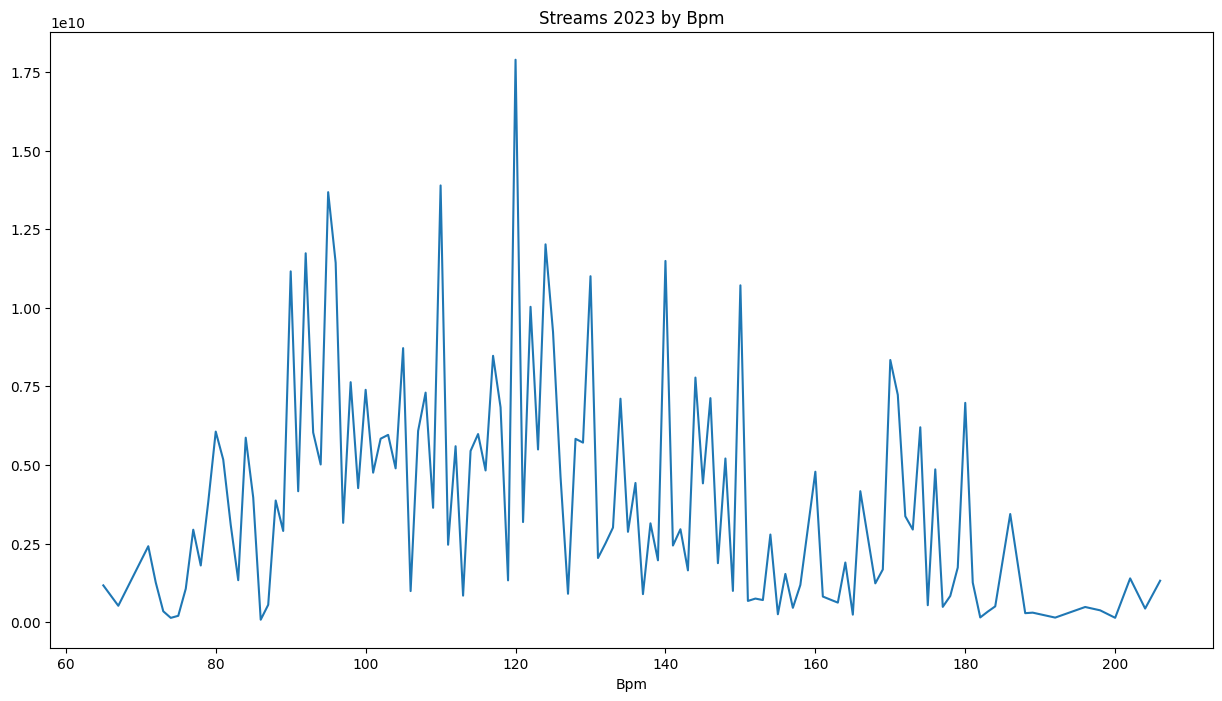

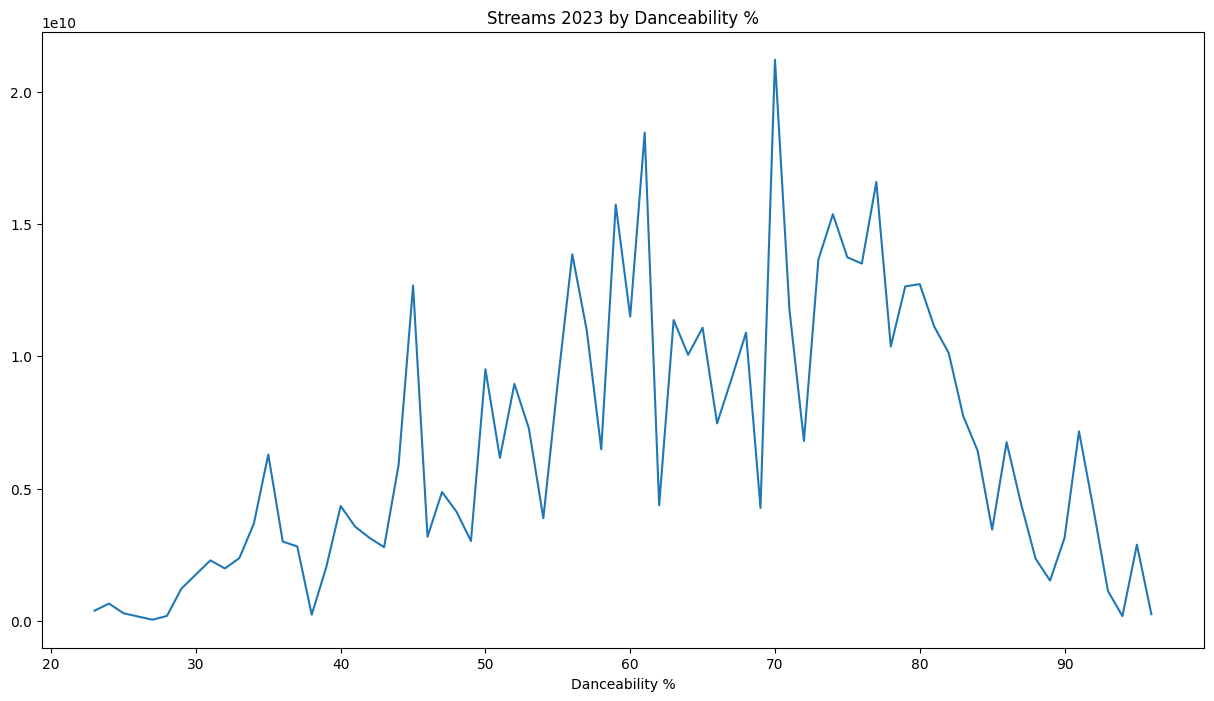

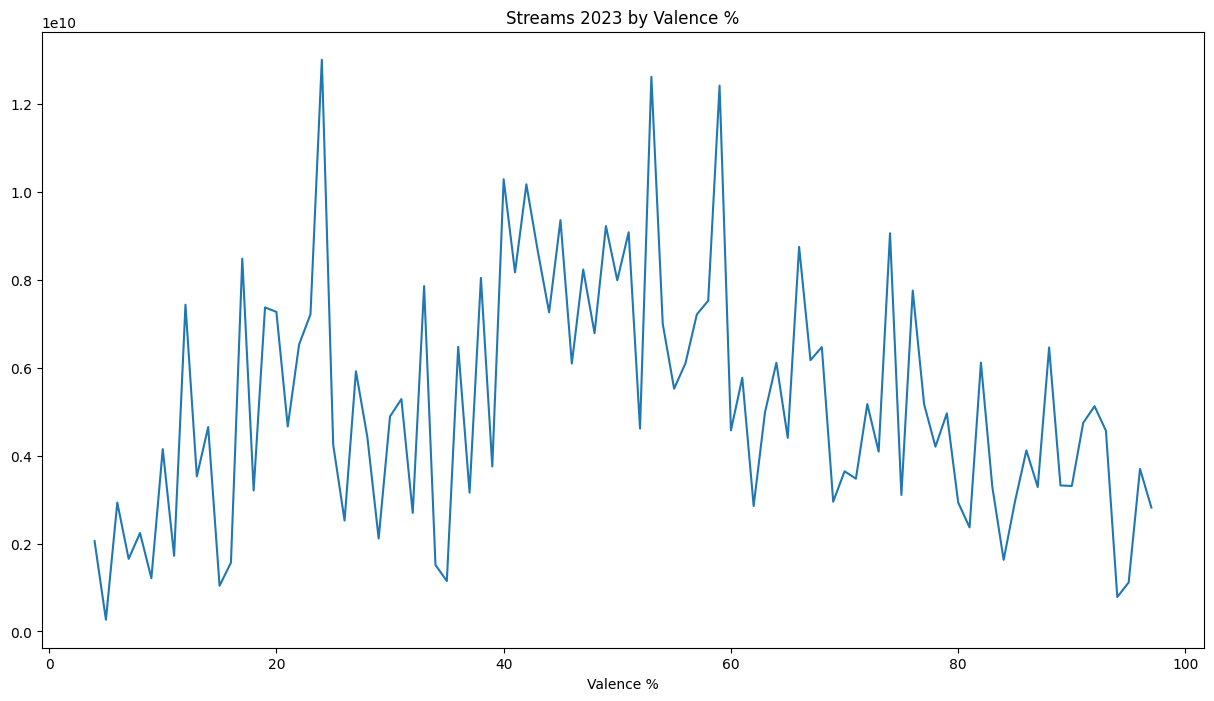

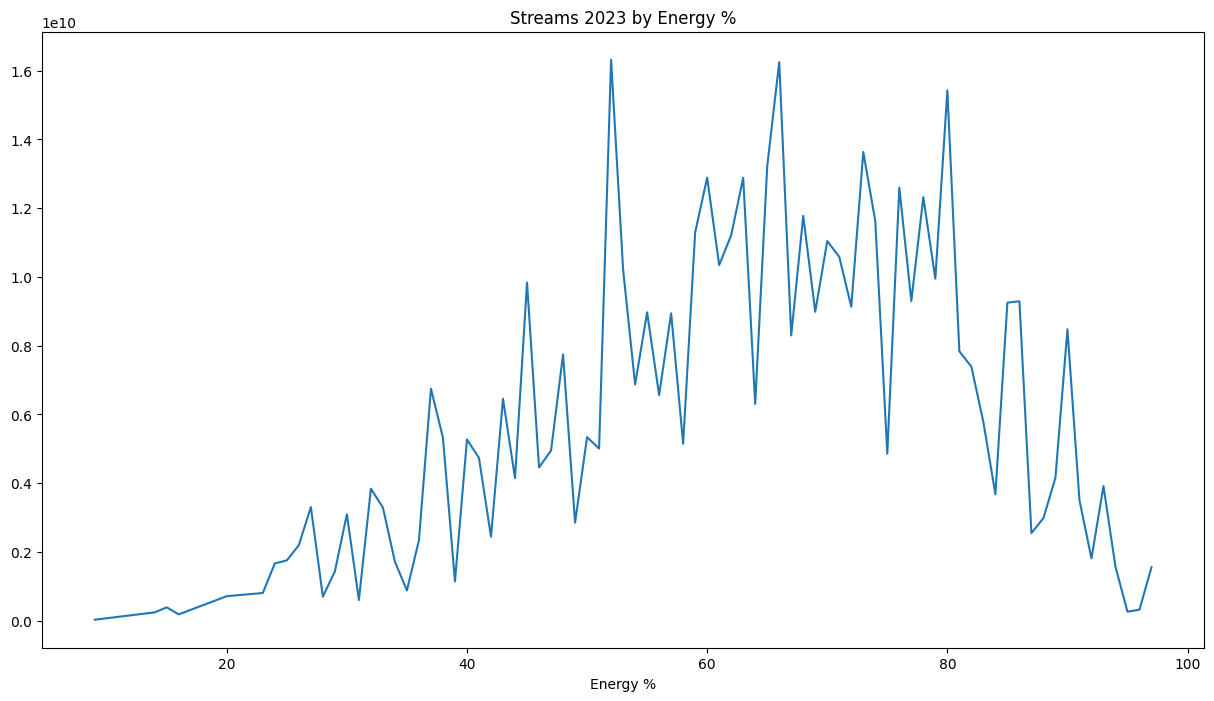

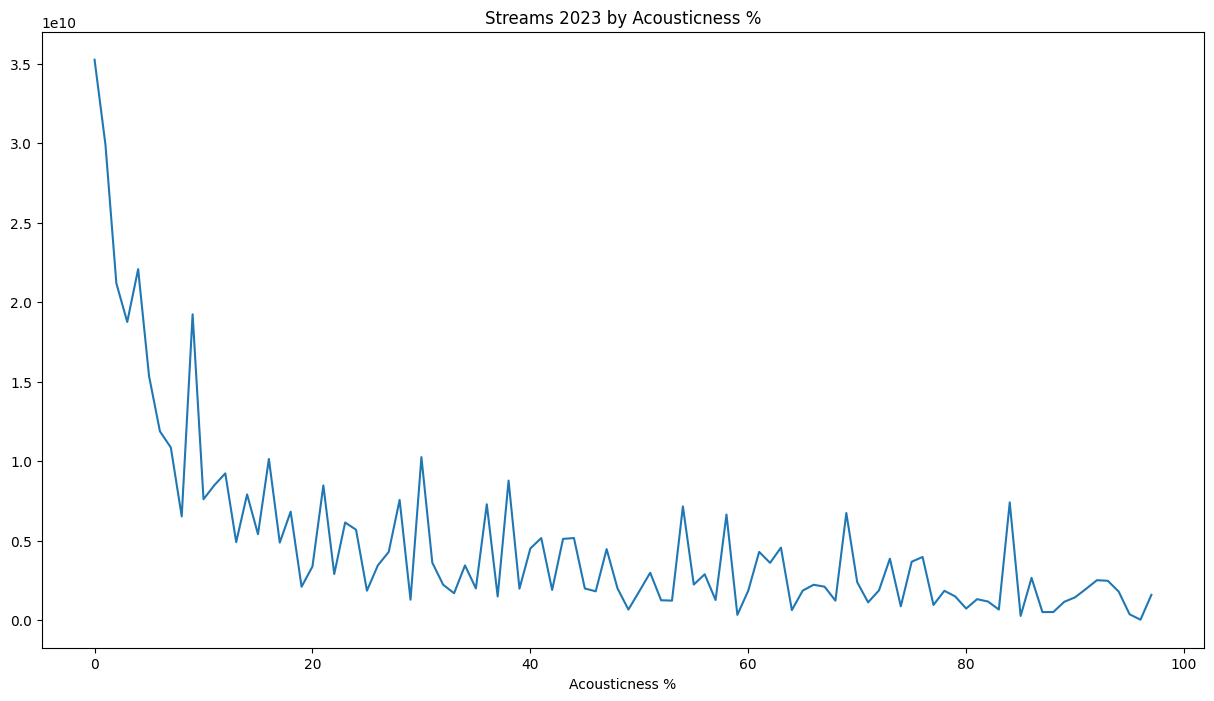

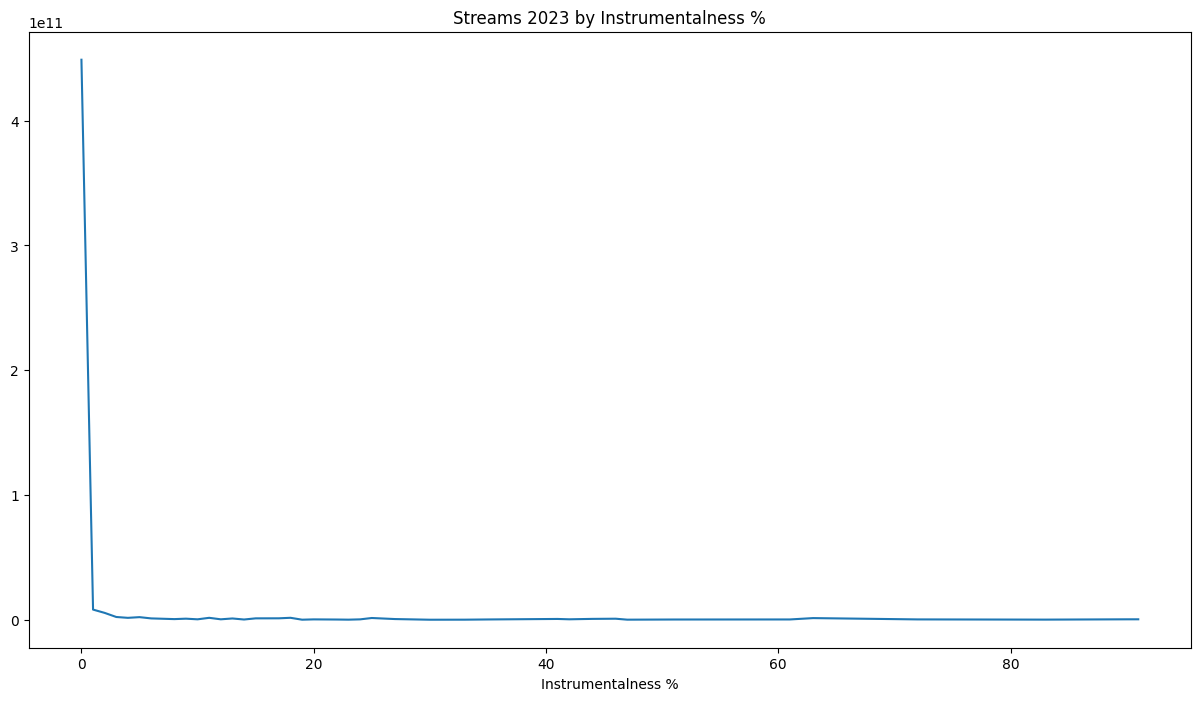

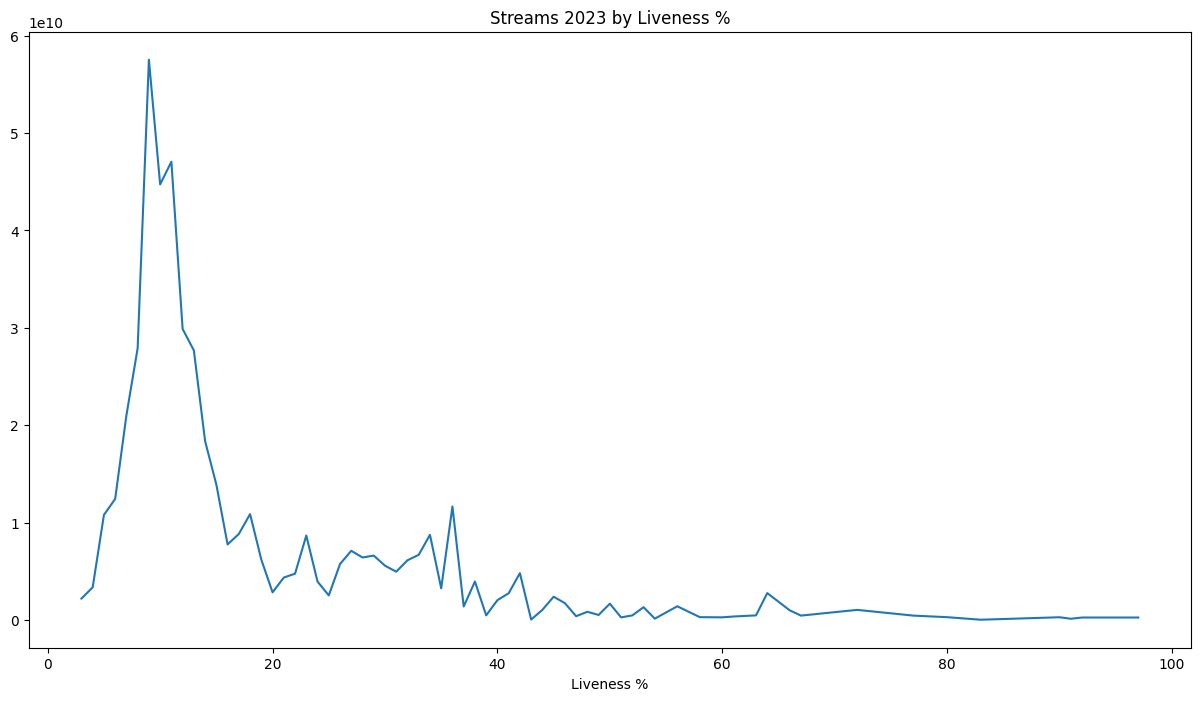

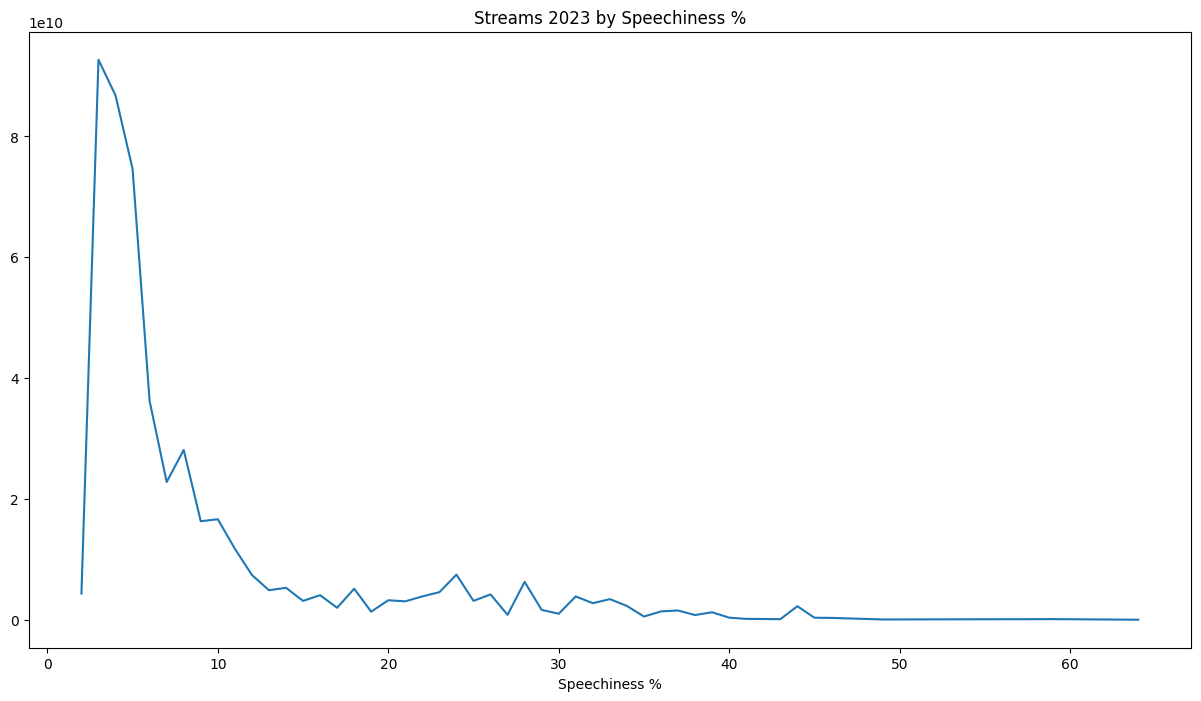

In [23]:
for feature in list_of_numerical_features:
    feature_on_total_stream_numerical(data_2023, feature, "Streams 2023")

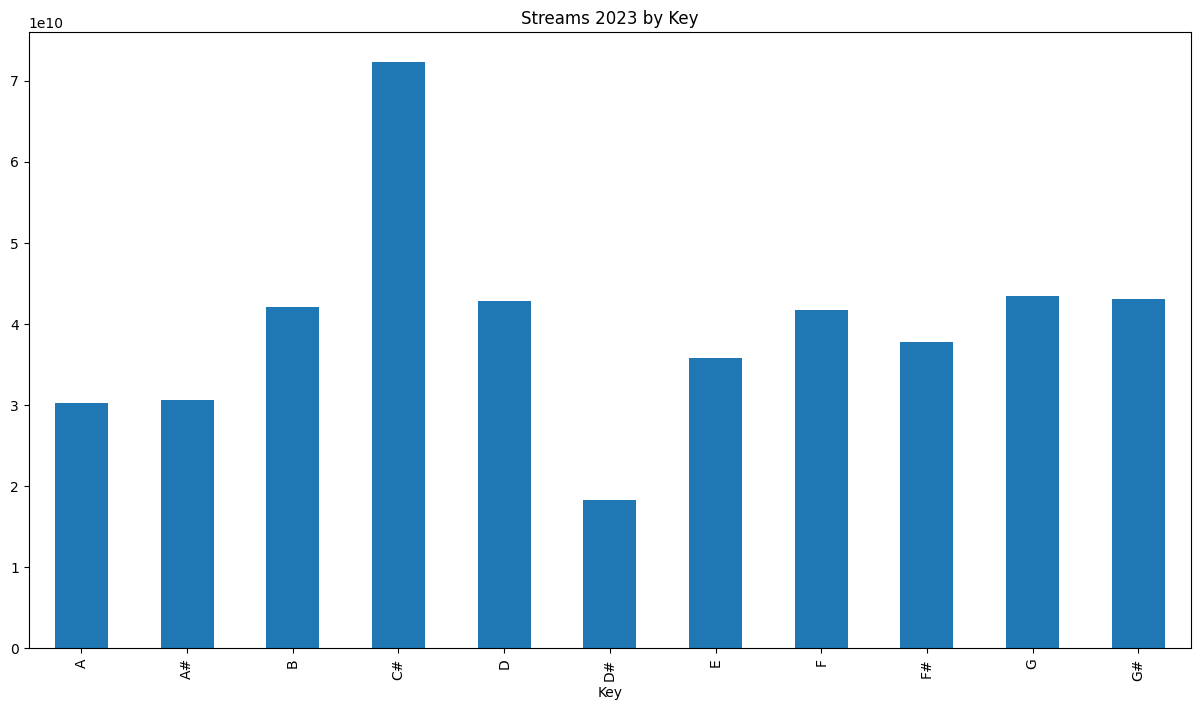

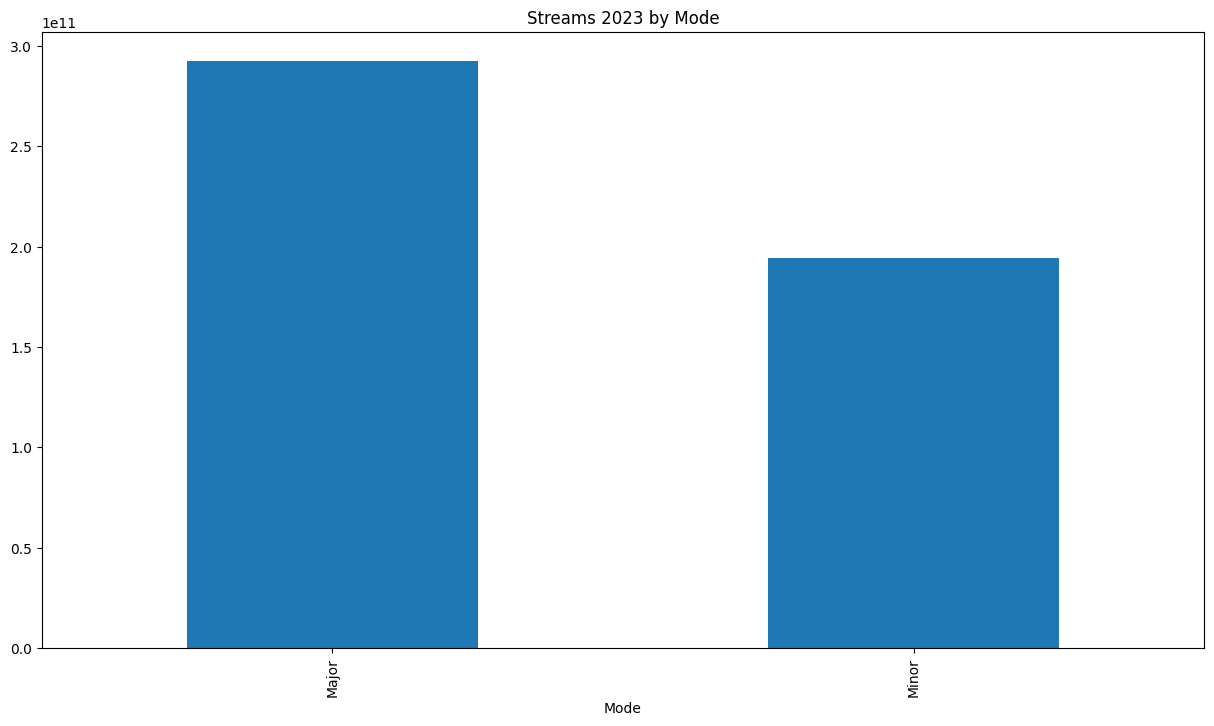

In [24]:
for feature in ["Key", "Mode"]:
    feature_on_total_stream_object(data_2023, feature, "Streams 2023")

### Analysis on number of appearance on charts

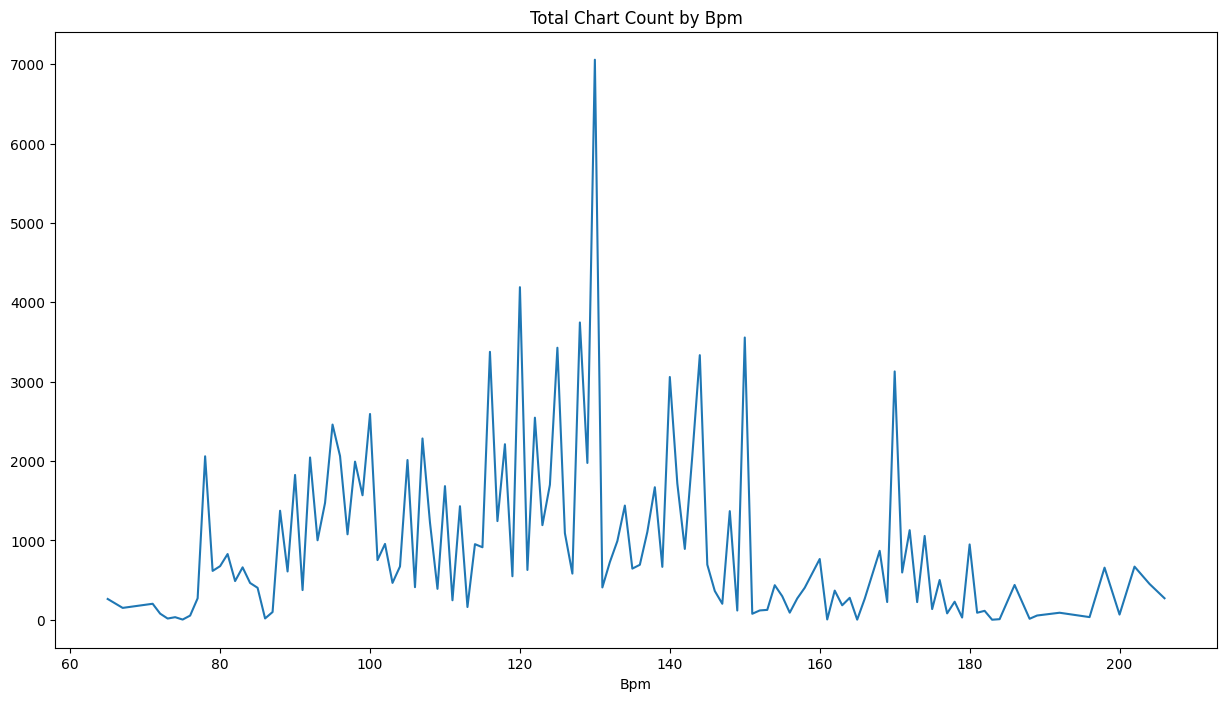

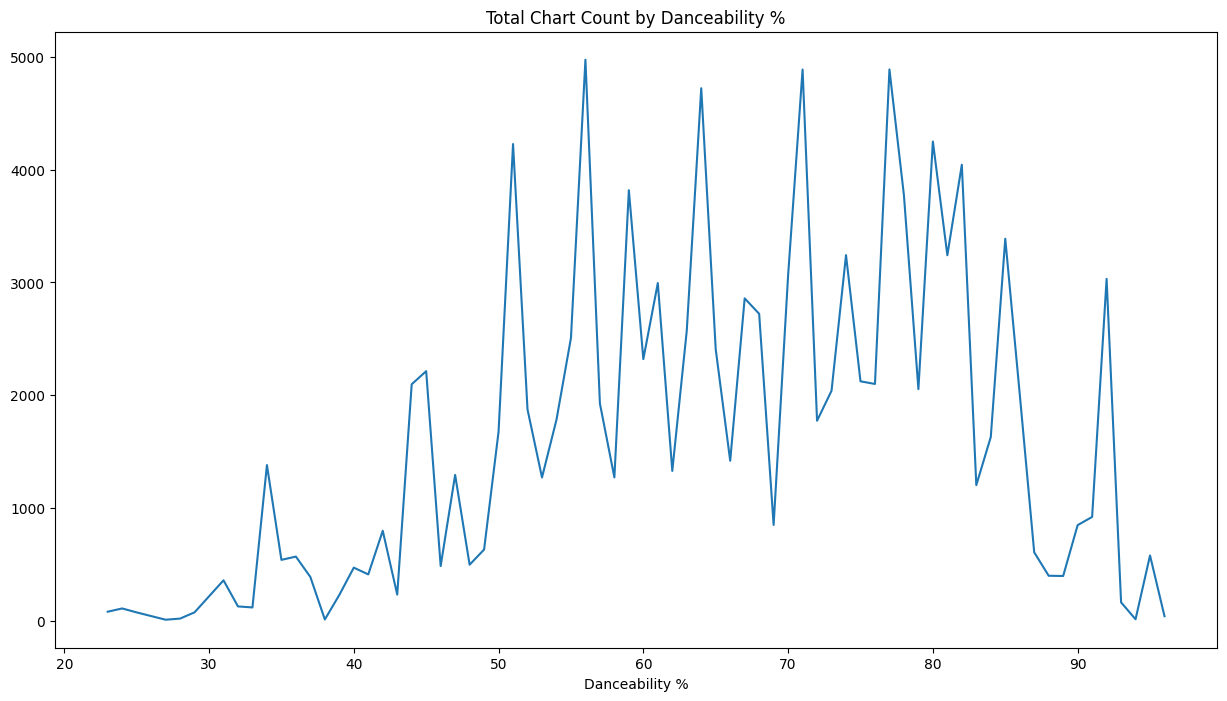

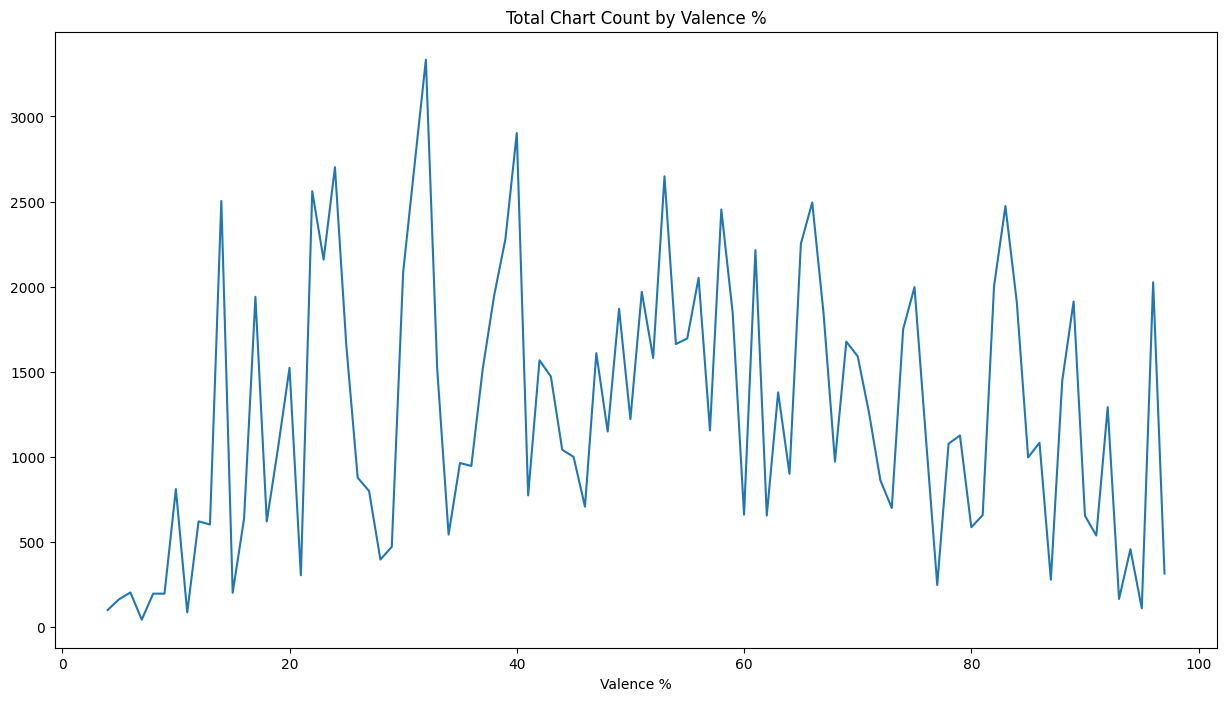

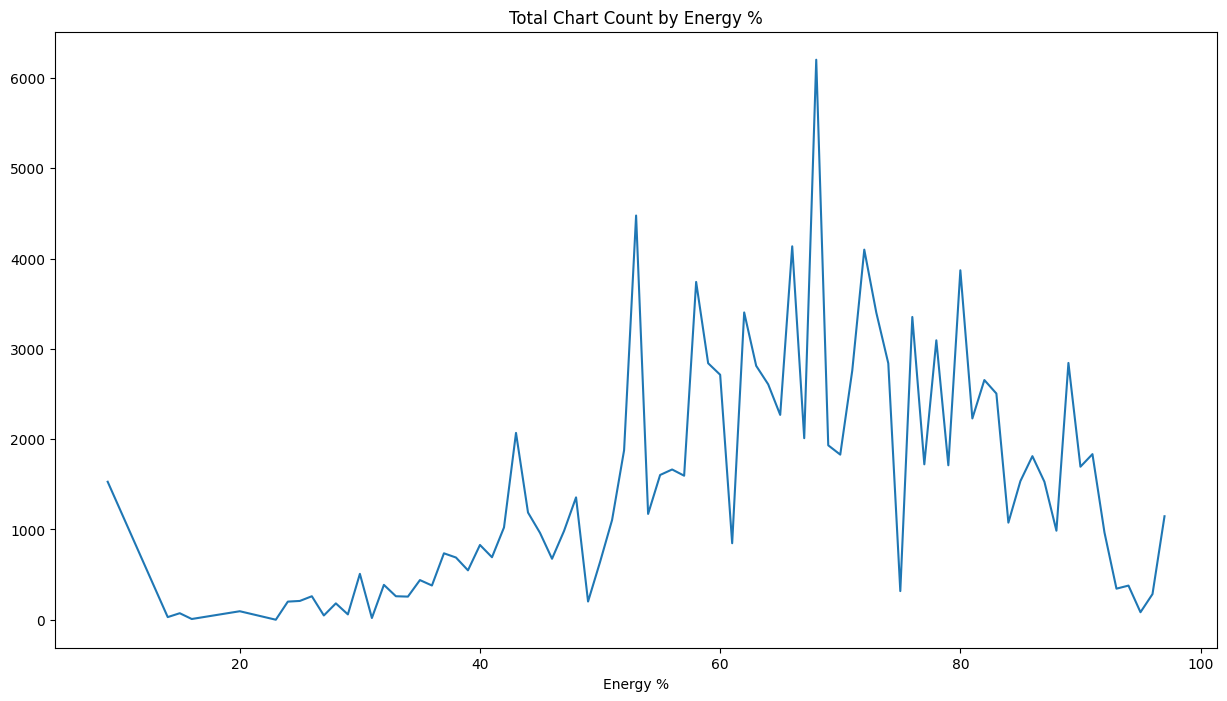

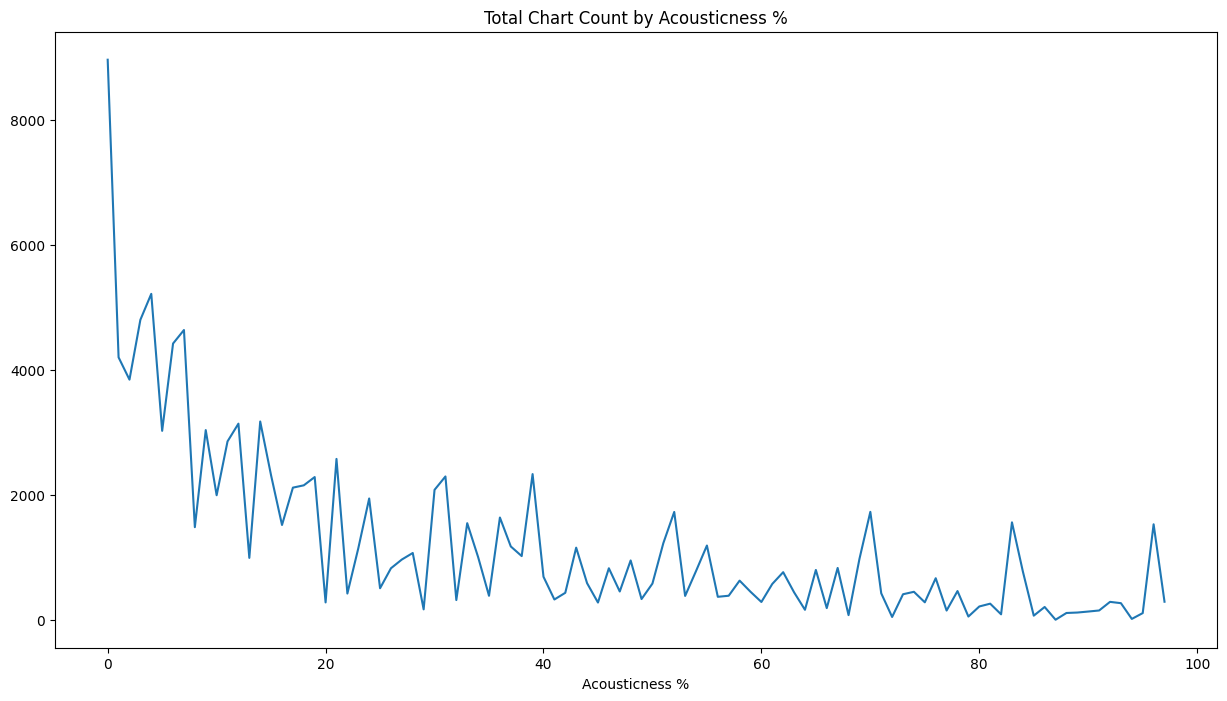

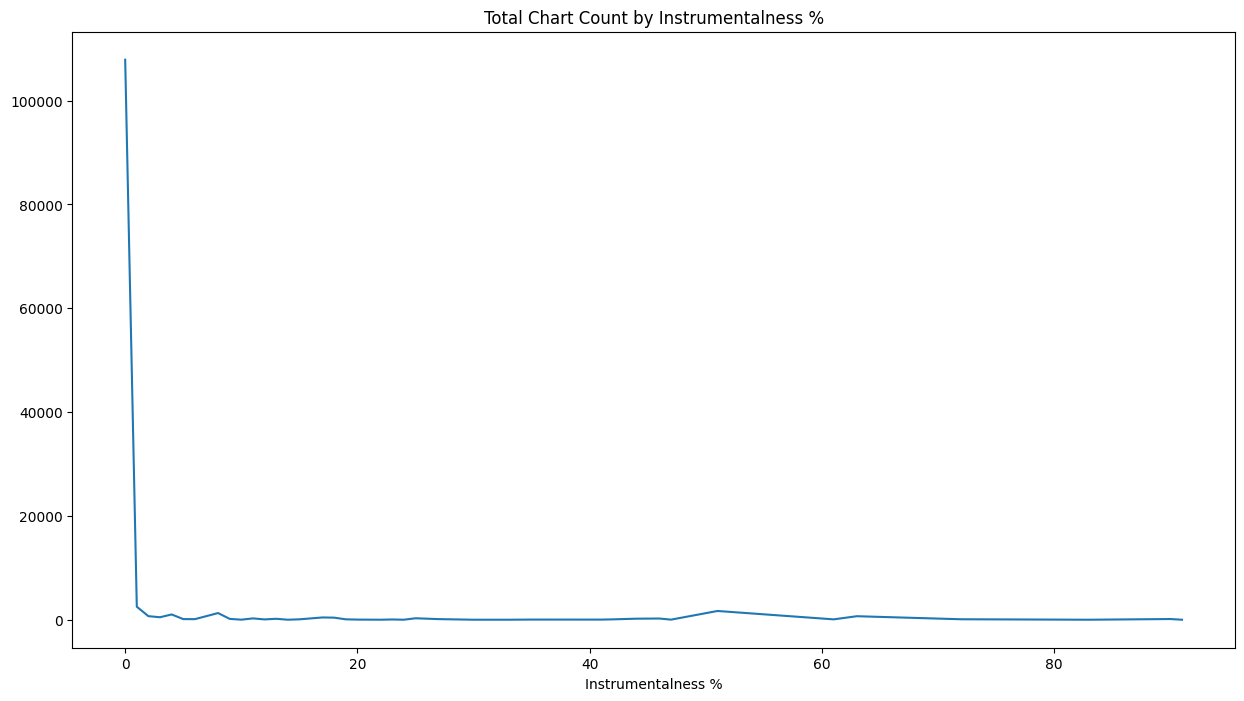

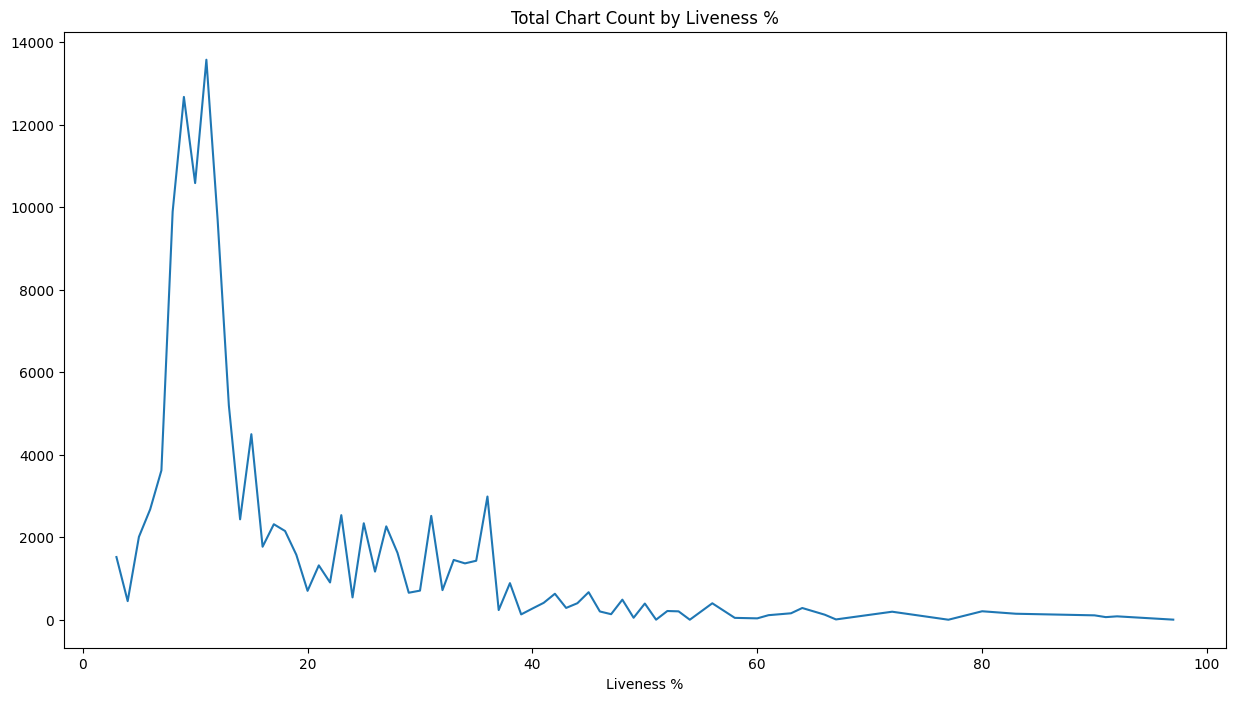

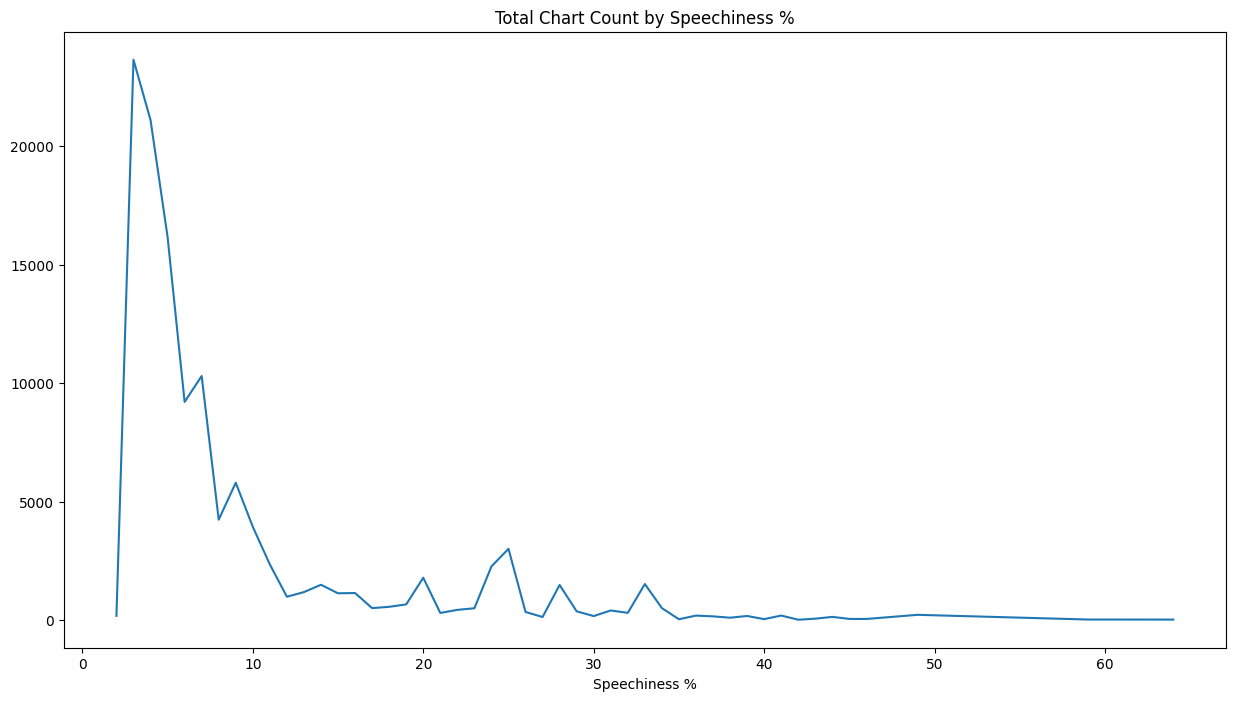

In [25]:
data_2023["Total Chart Count"] = data_2023["Apple Music Chart Counts 2023"] + data_2023["Spotify Chart Counts 2023"] + data_2023["Deezer Chart Counts 2023"] + data_2023["Shazam Chart Counts 2023"]
for feature in list_of_numerical_features:
    feature_on_total_stream_numerical(data_2023, feature, "Total Chart Count")

What we can see among top songs:

+ Medium to High bpm: 120 - 140 

+ C# is the most prefered key

+ Mode: No significant difference between major and minor

+ Danceability: People prefer songs that have the danceability between 55-85%

+ Valence: No significant difference between levels of valence

+ Energy: People prefer songs with high energy, but not too high

+ Acousticness (Amount of acoustic sound in the song): Seems that acoustic music is not the trend in 2023

+ Instrumentalness (Amount of instrumental content in the song): Most of the songs have only 10% instrucmentalness

+ Liveness (Presence of live performance elements): Most songs only have 10-20% presence of live performance elements

+ Speechiness (Amount of spoken words): Again, majority of the songs in the list have so little amount of spoken words.

## Analysis on change between 2023 and 2024

Question: Are these kinds of songs still popular in 2024

In [26]:
# Encoding the track and artist name so that we can get the intersection between 2 datasets

data_2023["song_encoding"] = data_2023["Track"].str.lower().str.replace(' ', '')
data_2023["artist_encoding"] = data_2023["Artist"].str.lower().str.replace(' ', '')

data_2024["song_encoding"] = data_2024["Track"].str.lower().str.replace(' ', '')
data_2024["artist_encoding"] = data_2024["Artist"].str.lower().str.replace(' ', '')

# Merging to make combined df

combined_df = pd.merge(data_2023, data_2024, on=["song_encoding", "artist_encoding"], how='inner')
combined_df.drop(columns=["Track_y", "Artist_y", "Release Date_y"], inplace=True)
combined_df.rename(columns={"Track_x":"Track", "Artist_x":"Artist", "Release Date_x":"Release Date"}, inplace=True)

In [27]:
combined_df

,Unnamed: 0_x,Track,Artist,Release Date,Spotify Playlist Count 2023,Spotify Chart Counts 2023,Streams 2023,Apple Music Playlist Count 2023,Apple Music Chart Counts 2023,Deezer Playlist Count 2023,...,Apple Music Playlist Count 2024,AirPlay Spins 2024,SiriusXM Spins 2024,Deezer Playlist Count 2024,Deezer Playlist Reach 2024,Amazon Playlist Count 2024,Pandora Streams 2024,Pandora Track Stations 2024,Soundcloud Streams 2024,Shazam Counts 2024
0,1,LALA,Myke Towers,3/23/2023,1474,48,133716286.0,48,126,58,...,94.0,92231.0,228.0,60.0,5633435.0,83.0,12171026.0,13242.0,871978.0,2765808.0
1,2,vampire,Olivia Rodrigo,6/30/2023,1397,113,140003974.0,94,207,91,...,221.0,462541.0,93.0,63.0,5258300.0,130.0,28318435.0,67590.0,4296515.0,4872257.0
2,3,Cruel Summer,Taylor Swift,8/23/2019,7858,100,800840817.0,116,207,125,...,273.0,913464.0,1264.0,122.0,21554174.0,117.0,60954563.0,84157.0,2171676.0,3476323.0
3,4,WHERE SHE GOES,Bad Bunny,5/18/2023,3133,50,303236322.0,84,133,87,...,142.0,57686.0,125.0,35.0,1416698.0,41.0,22701001.0,8039.0,4037512.0,2076698.0
4,7,Columbia,Quevedo,7/7/2023,714,43,58149378.0,25,89,30,...,47.0,51158.0,44.0,39.0,1537049.0,64.0,260176.0,1269.0,120842.0,1148958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,924,2 Be Loved (Am I Ready),Lizzo,7/14/2022,3682,6,247689123.0,41,0,158,...,32.0,310508.0,786.0,33.0,1463818.0,17.0,23408066.0,4415.0,0.0,0.0
410,926,Typa Girl,BLACKPINK,9/16/2022,452,10,235549288.0,2,129,13,...,5.0,1109.0,14.0,2.0,80569.0,7.0,1790458.0,2002.0,1604862.0,359205.0
411,928,California Breeze,Lil Baby,10/14/2022,991,0,85559365.0,36,38,13,...,44.0,4710.0,200.0,5.0,90714.0,1.0,44593072.0,13300.0,17609055.0,671214.0
412,944,The Astronaut,Jin,10/28/2022,481,9,203436468.0,10,100,15,...,10.0,17017.0,0.0,9.0,1696802.0,8.0,1642033.0,622.0,0.0,16922782.0


There are 415 songs which appear in both dataset

In [28]:
combined_df["Spotify Playlist Difference"] = combined_df["Spotify Playlist Count 2024"] - combined_df["Spotify Playlist Count 2023"]
combined_df["Apple Music Playlist Difference"] = combined_df["Apple Music Playlist Count 2024"] - combined_df["Apple Music Playlist Count 2023"]
combined_df["Deezer Playlist Difference"] = combined_df["Deezer Playlist Count 2024"] - combined_df["Deezer Playlist Count 2023"]
combined_df["Spotify Stream Difference"] = combined_df["Spotify Streams 2024"] - combined_df["Streams 2023"]

### Tracks that have experienced a significant change in popularity compared to 2023:

In [29]:
# barplot to visualize the track with highest popularity improvement

def songs_with_highest_popularity_increase(feature):

    df = combined_df.sort_values(by=feature, ascending=False).head(10)
    plt.bar(df["Track"], df[feature])

    plt.xlabel("Track")
    plt.ylabel(feature)
    plt.title("Top 10 Tracks with the Highest "+ feature)
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

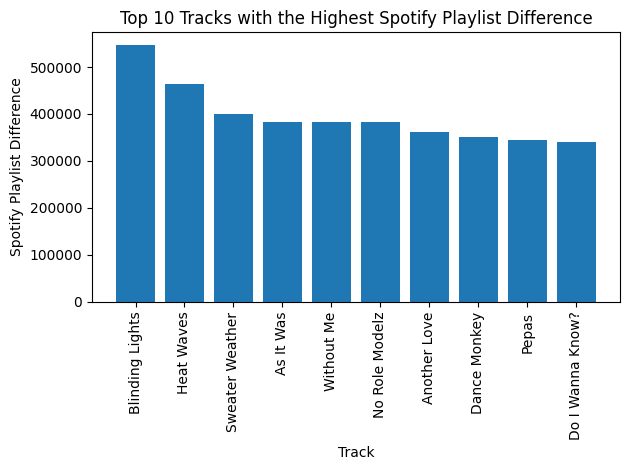

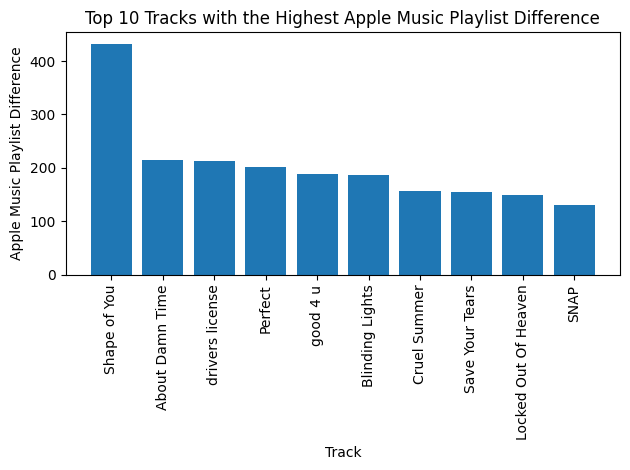

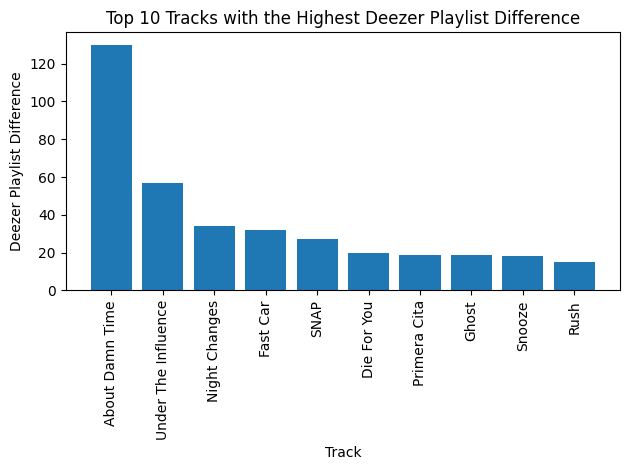

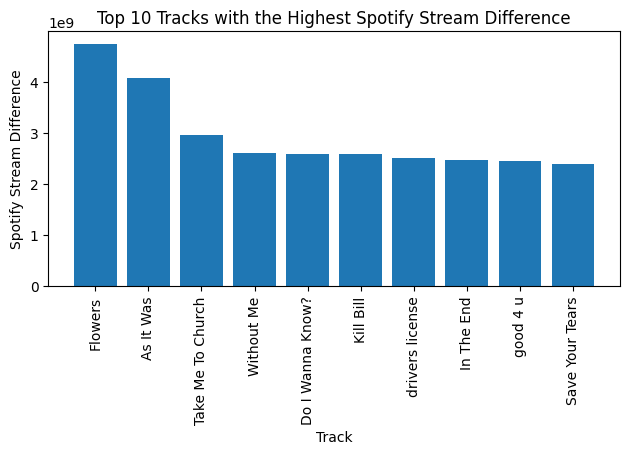

In [30]:
for feature in ["Spotify Playlist Difference", "Apple Music Playlist Difference", "Deezer Playlist Difference", "Spotify Stream Difference"]:
    songs_with_highest_popularity_increase(feature)

We can see that some tracks are top tracks of different audio streaming services provider, such as: About Damn Time, good 4 u, Do I Wanna Know?

### Analysis on genre of these tracks

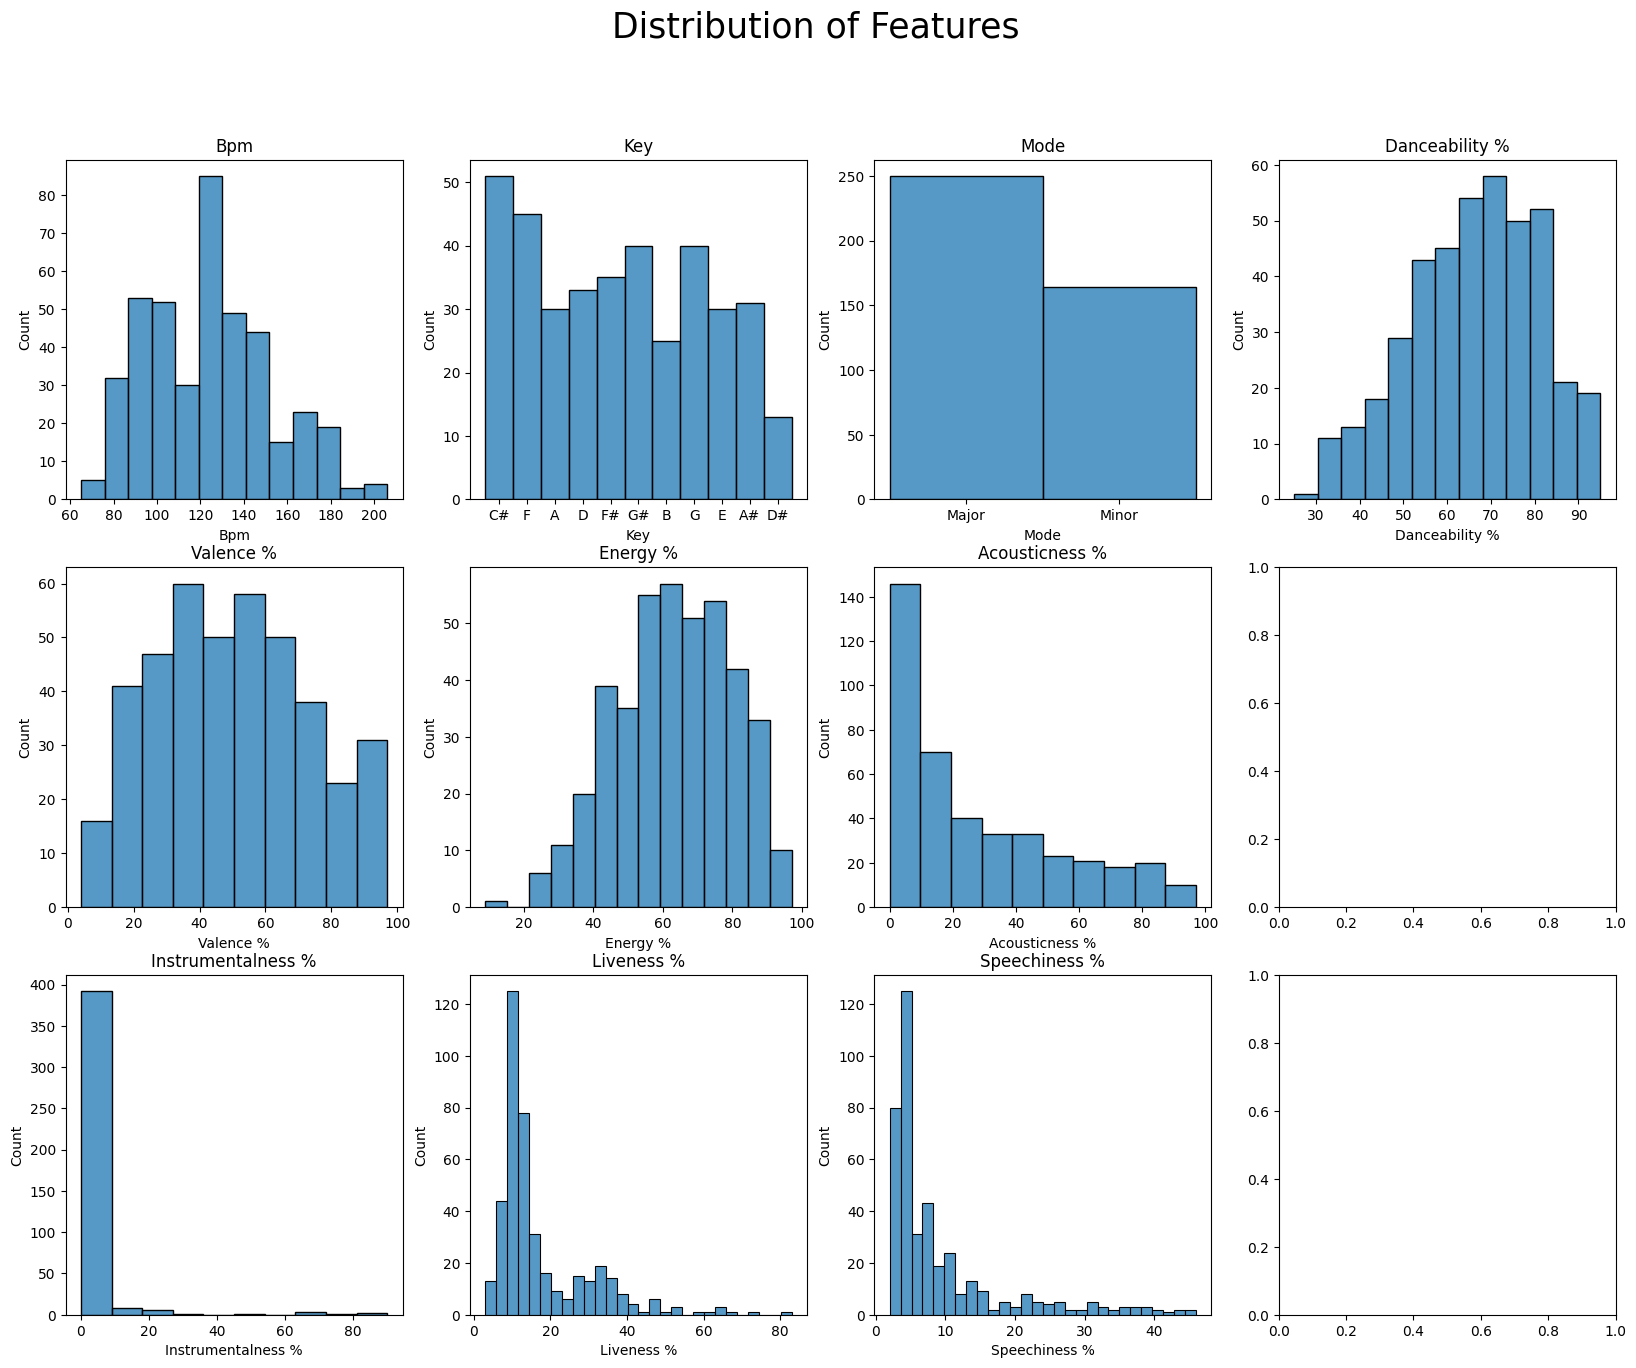

In [31]:
feature_distribution(combined_df)

In [32]:
combined_df["Total Streams"] = combined_df["Spotify Streams 2024"] + combined_df["Pandora Streams 2024"] + combined_df["Soundcloud Streams 2024"]

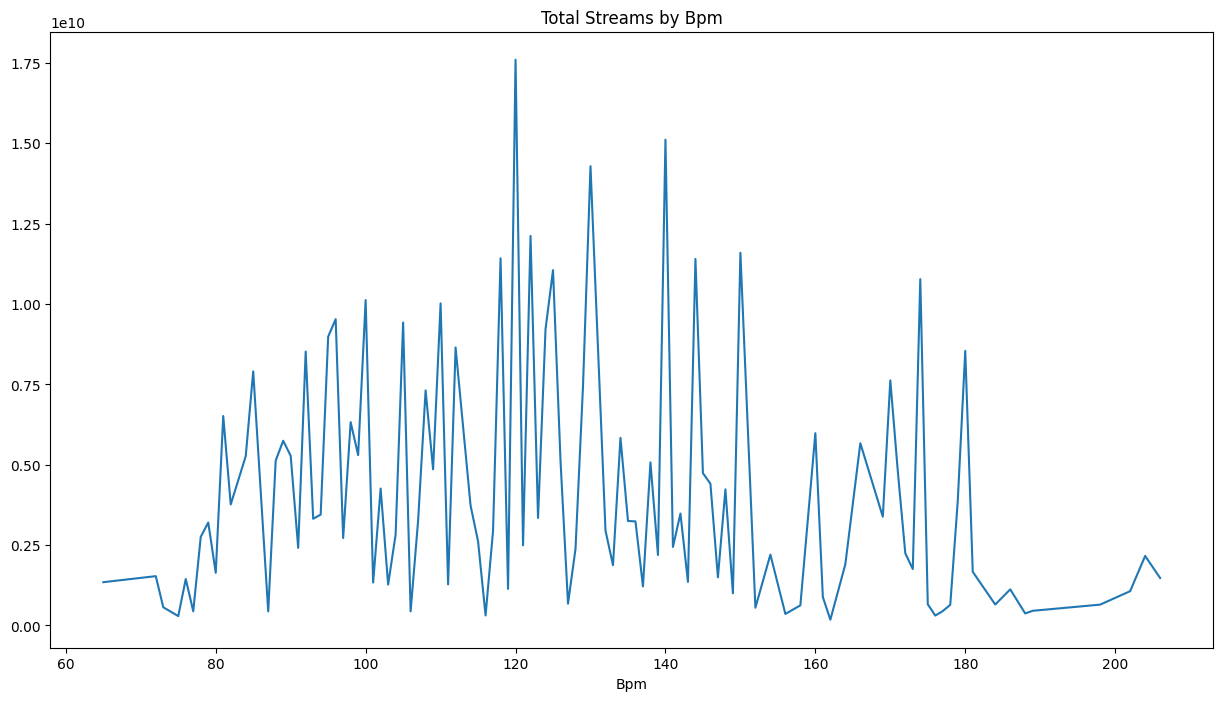

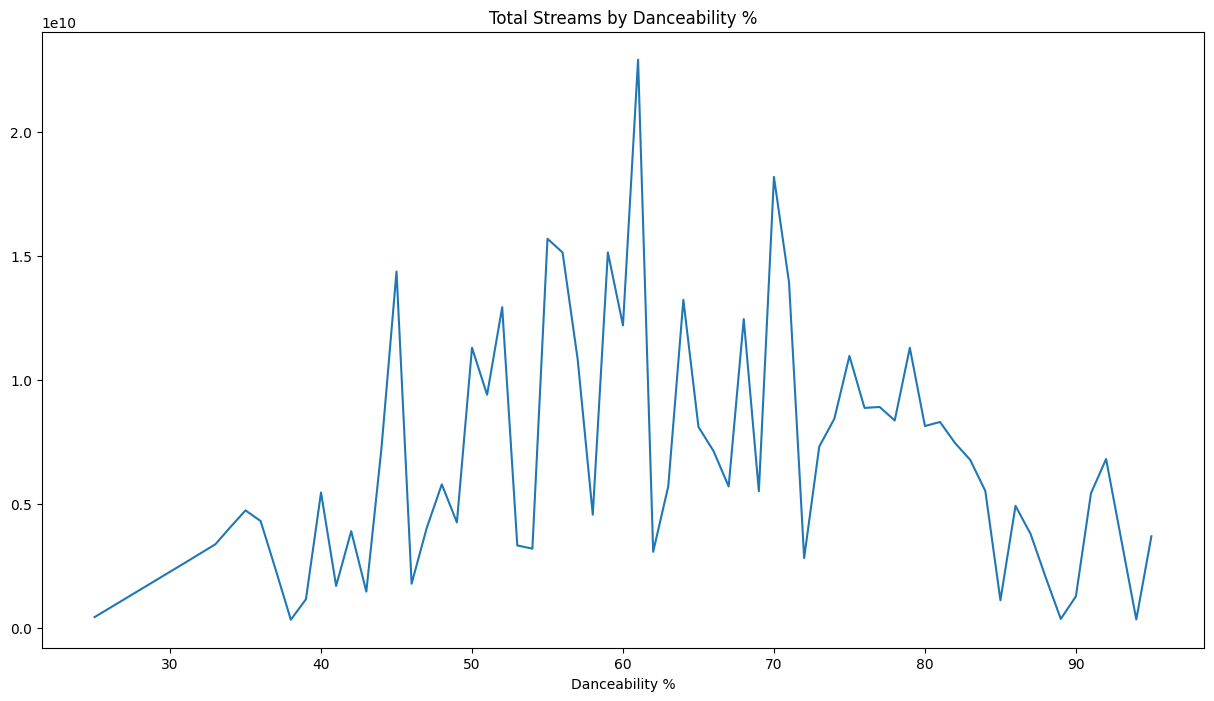

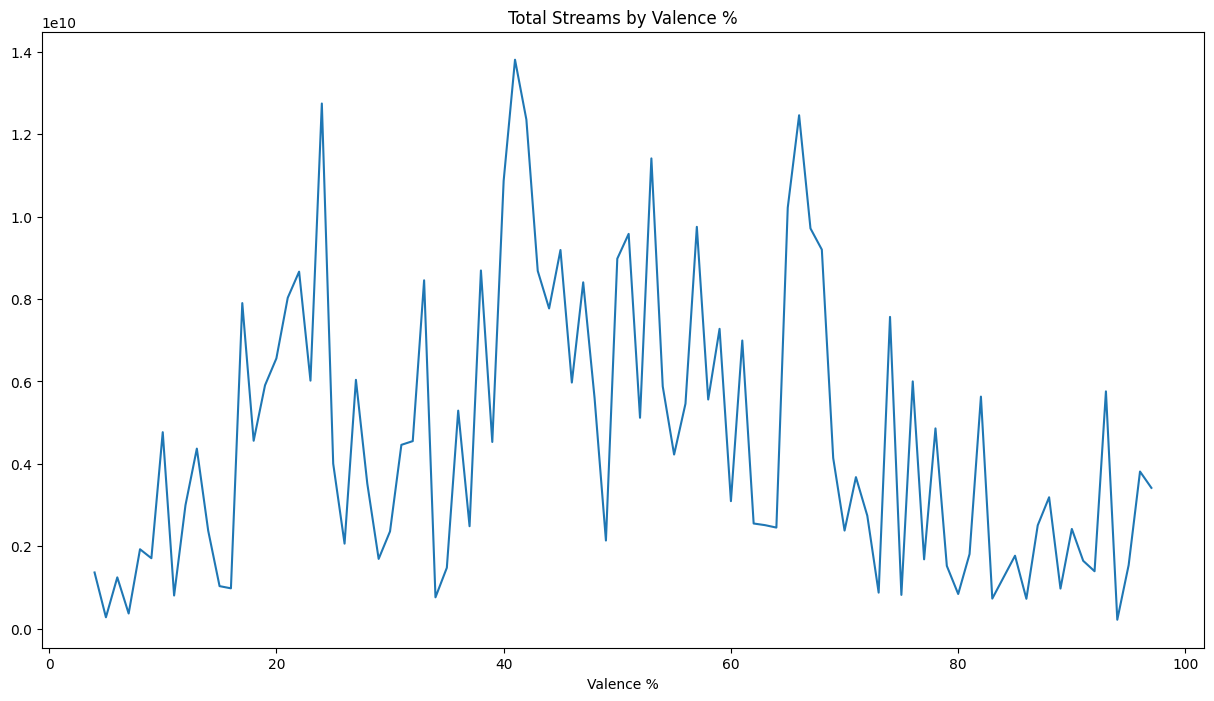

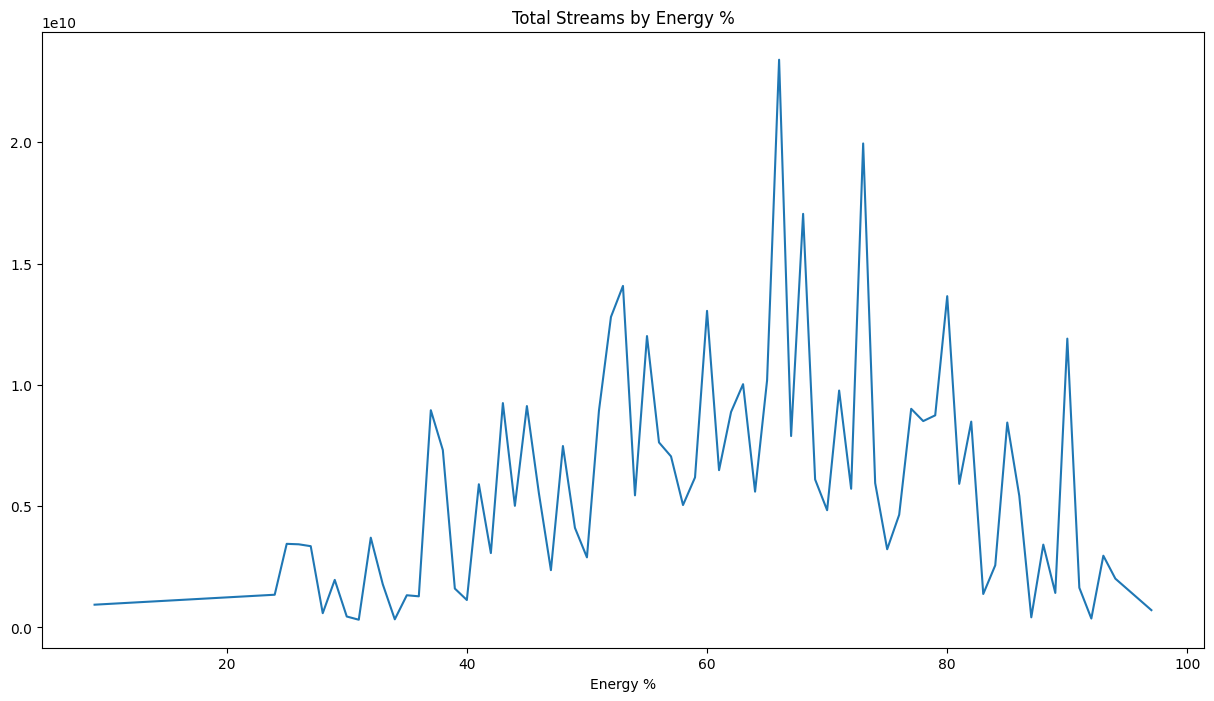

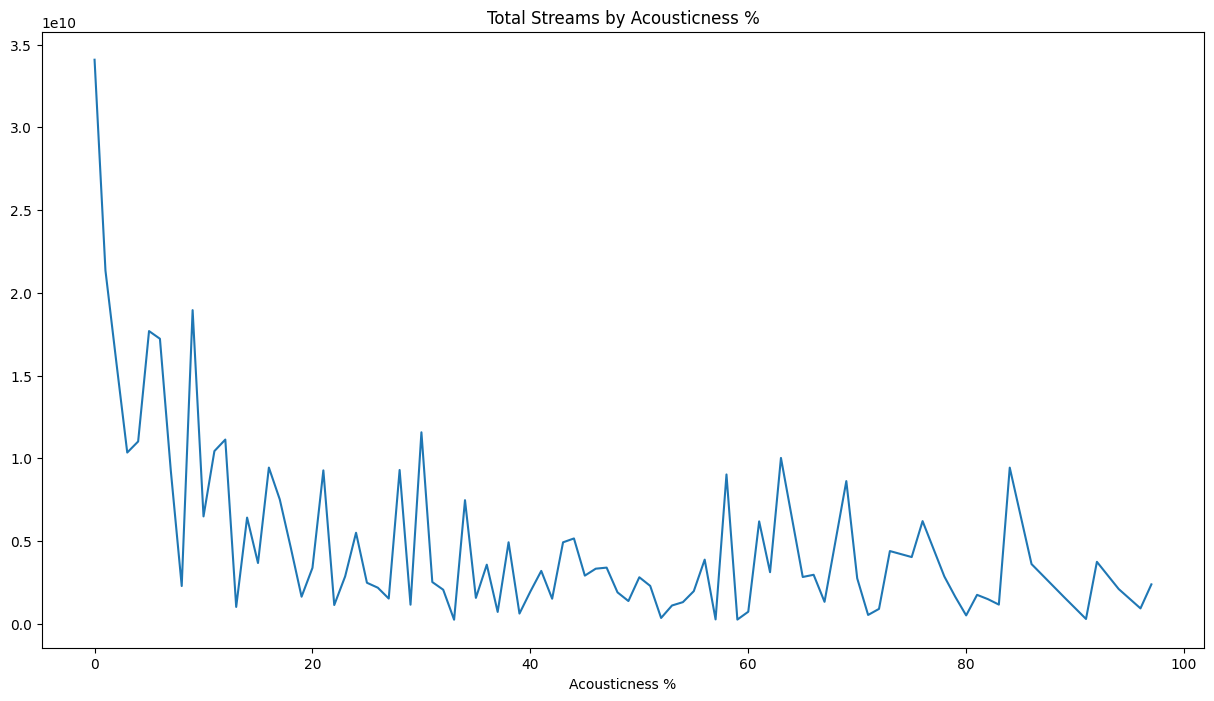

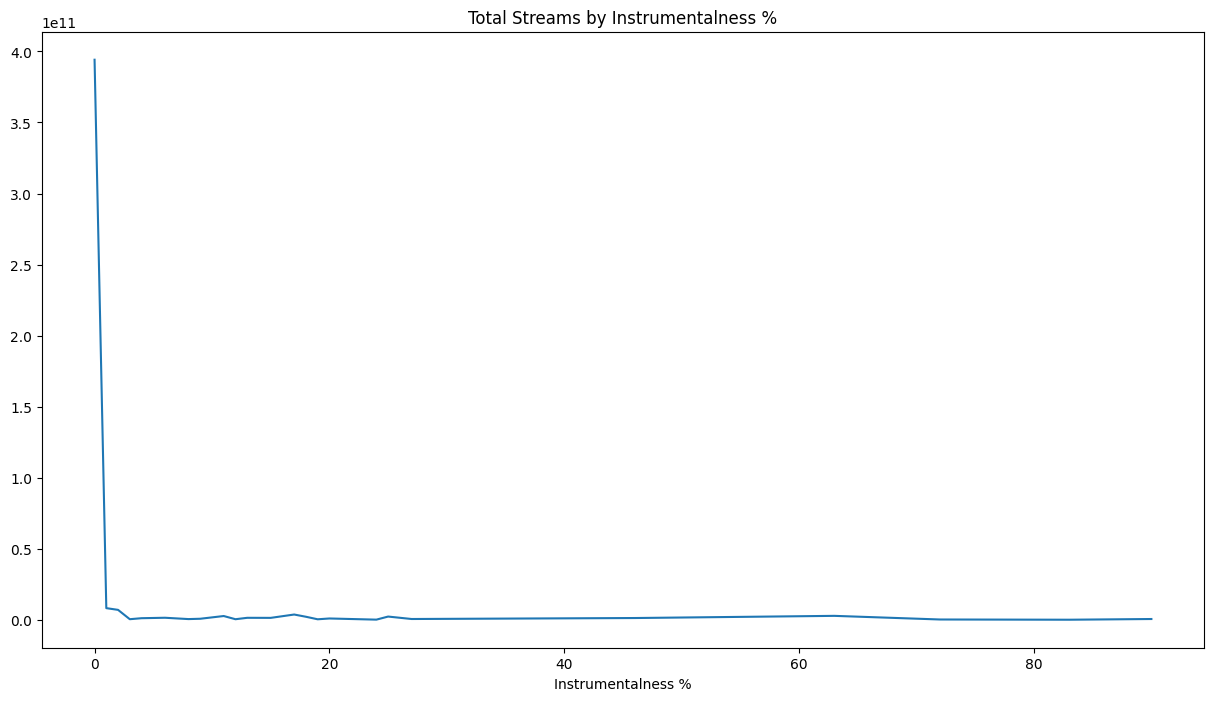

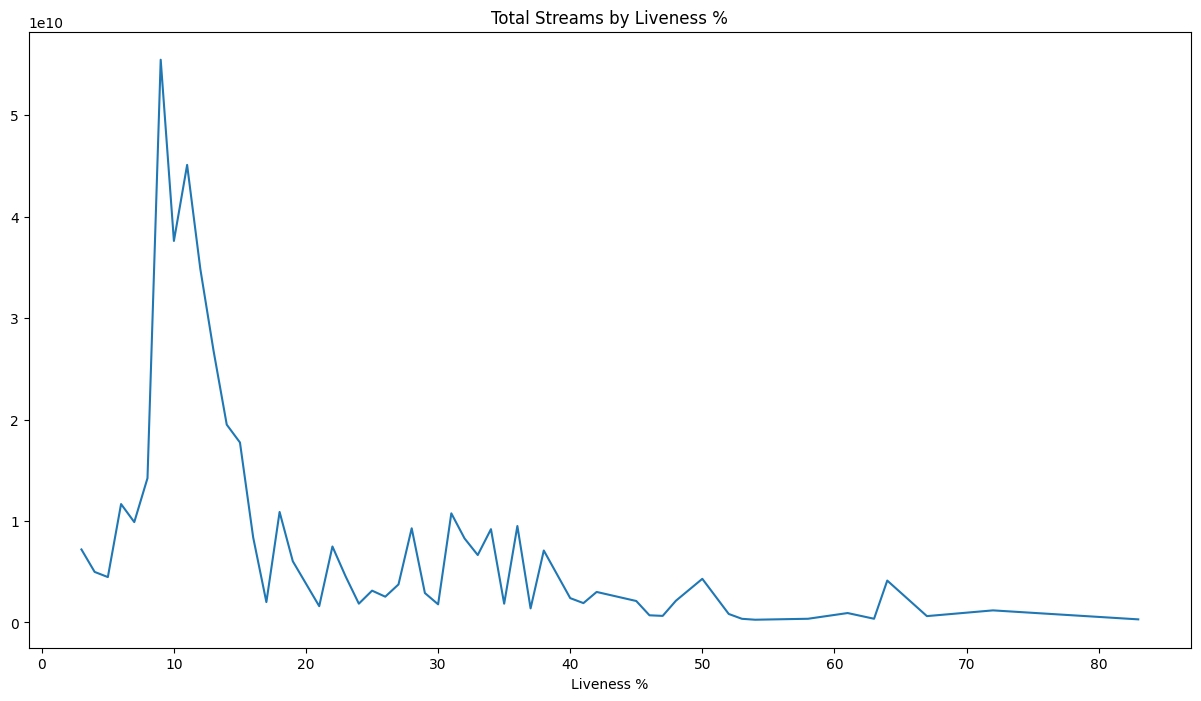

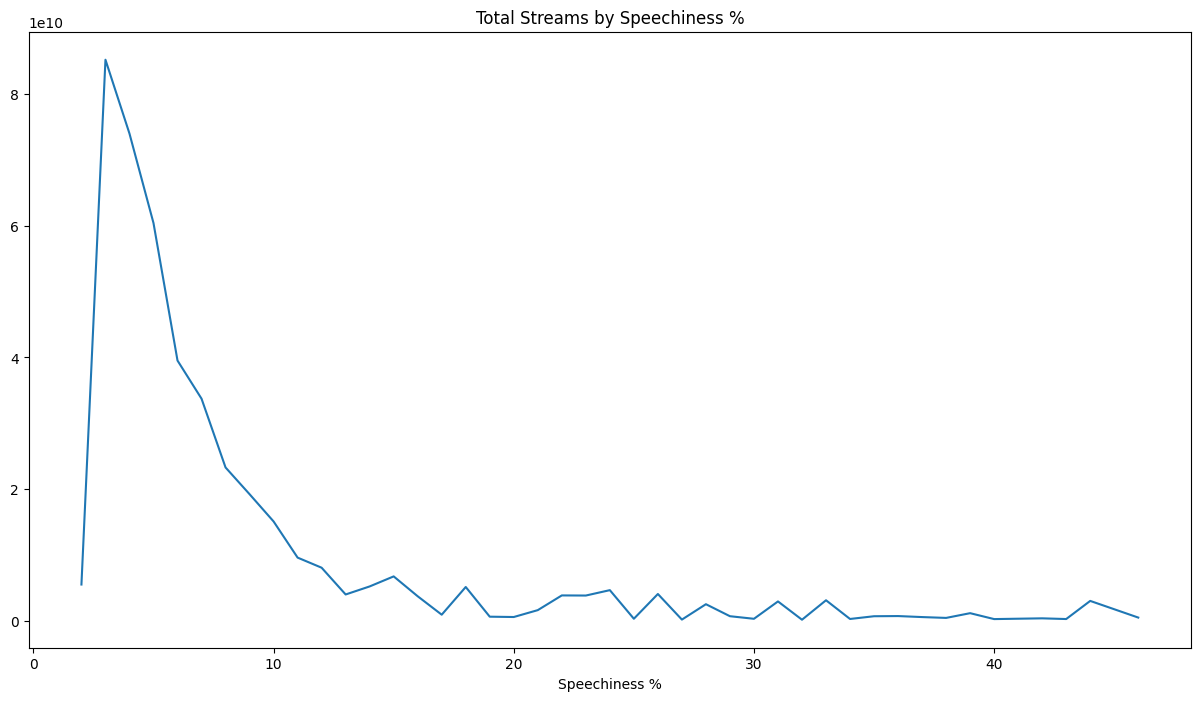

In [33]:
for feature in list_of_numerical_features:
    feature_on_total_stream_numerical(combined_df, feature, "Total Streams")

Same trends among these track compared to 2023. It shows that for tracks that appear on both years, the genres trend remains the same

## Analysis on 2024

### Top song Overall

Using track score

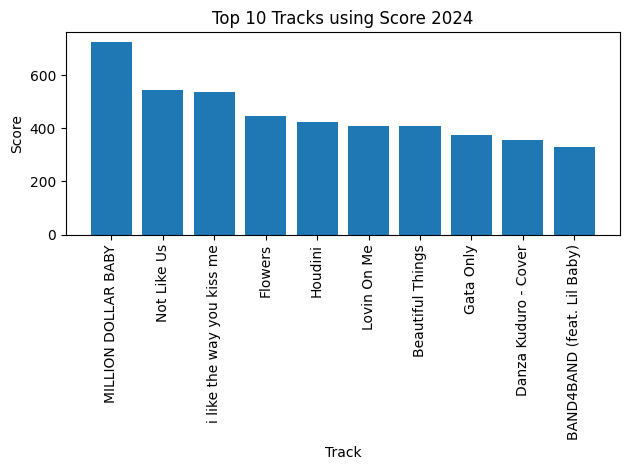

In [34]:
# Top 10 Tracks using Score 2024

df = data_2024.sort_values(by="Track Score 2024", ascending=False).head(10)
plt.bar(df["Track"], df["Track Score 2024"])

plt.xlabel("Track")
plt.ylabel("Score")
plt.title("Top 10 Tracks using Score 2024")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Top Song on Spotify 2024

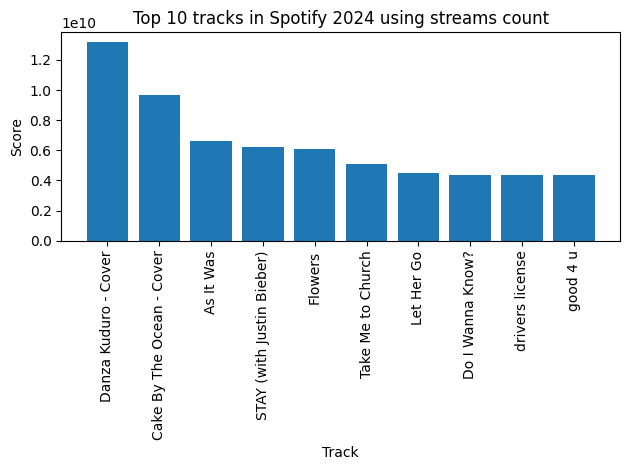

In [35]:
# Top 10 tracks in Spotify 2024 using streams count

df = data_2024.sort_values(by="Spotify Streams 2024", ascending=False).head(10)
plt.bar(df["Track"], df["Spotify Streams 2024"])

plt.xlabel("Track")
plt.ylabel("Score")
plt.title("Top 10 tracks in Spotify 2024 using streams count")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

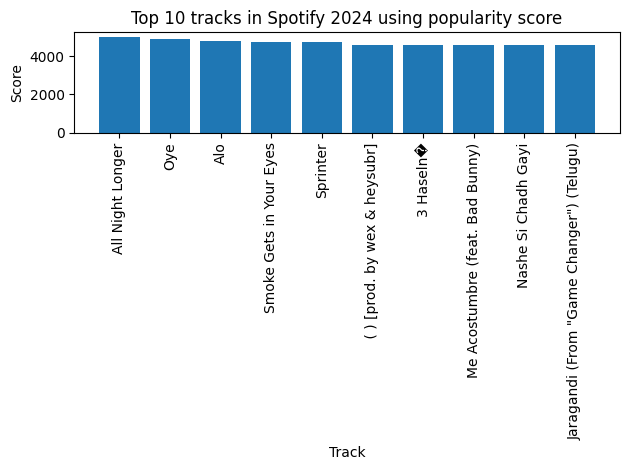

In [36]:
# Top 10 tracks in Spotify 2024 using popularity score

df = data_2024.sort_values(by="Spotify Popularity 2024", ascending=False).head(10)
plt.bar(df["Track"], df["Spotify Popularity 2024"])

plt.xlabel("Track")
plt.ylabel("Score")
plt.title("Top 10 tracks in Spotify 2024 using popularity score")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Top song on TikTok 2024

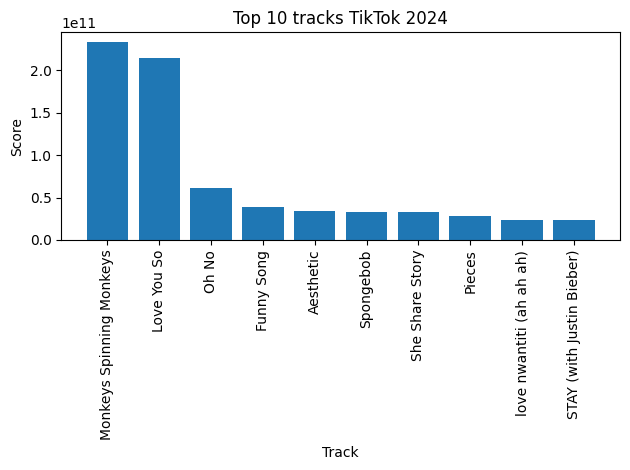

In [37]:
df = data_2024.sort_values(by="TikTok Views 2024", ascending=False).head(10)
plt.bar(df["Track"], df["TikTok Views 2024"])

plt.xlabel("Track")
plt.ylabel("Score")
plt.title("Top 10 tracks TikTok 2024")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Top Song on Soundcloud 2024

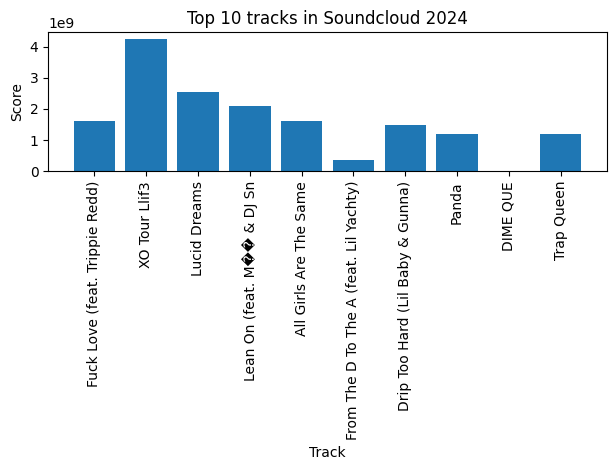

In [38]:
# Top 10 tracks in Soundcloud 2024

df = data_2024.sort_values(by="Soundcloud Streams 2024", ascending=False).head(10)
plt.bar(df["Track"], df["Spotify Streams 2024"])

plt.xlabel("Track")
plt.ylabel("Score")
plt.title("Top 10 tracks in Soundcloud 2024")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Top Song on Pandora 2024


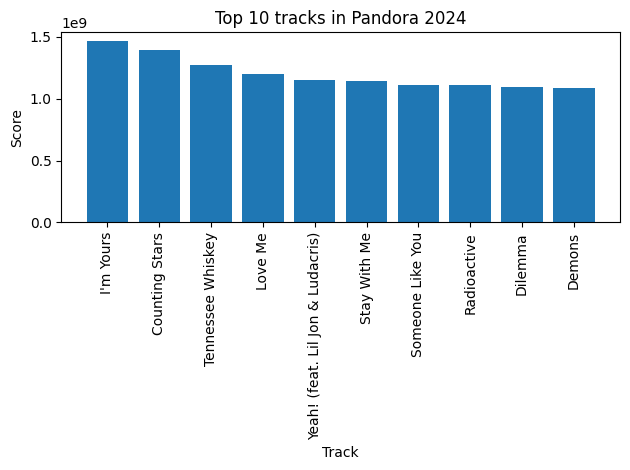

In [39]:
# Top 10 tracks in Pandora 2024

df = data_2024.sort_values(by="Pandora Streams 2024", ascending=False).head(10)
plt.bar(df["Track"], df["Pandora Streams 2024"])

plt.xlabel("Track")
plt.ylabel("Score")
plt.title("Top 10 tracks in Pandora 2024")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()